--- v3 updata---
评审老师好：
感谢老师的建议，反馈如下。
- `问题 1：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习四个组成部分对应的实际对象。`
    - 已修改。
- `问题 2：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。`
    - 之前遗漏了平地的 -0.1 的奖励计算。
    - 已修改。
- `问题 5：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。`
    - 更新v3代码，调用choose_action的时候输入参数1。已经检验为随机移动。
    - 代码输出增加了动作选择。
    - 已修改。
- `问题 6：实现 Robot.py 中的8段代码，并运行如下代码检查效果。`
    - 优化代码：已经使用建议的 setdefault 更新，更加简洁。
    - 优化Q-Learning公式理解：
        - 更新了公式，将现状前面的(1-a)系数去掉了。
        - 具体说明：<a href='#qtable'>/更新qtable解释(v3)/</a>
    - 已修改。
- `问题 7：尝试利用下列代码训练机器人，并进行调参。'
    - 增加了对于 epsilon、alpha、gamma参数的尝试。
    - 这一步的时候固定了maze。
    - 具体说明：<a href='#explor'>/更新参数探索(v3)/</a>
    - 已修改。
- `问题 8：使用 runner.plot_results() 输出训练结果，根据该结果对你的机器人进行分析。'
    - 根据前一问题，对结论做补充。
    - 具体说明：<a href='#final'>/更新最后结论(v3)/</a>
    - 已修改。
    - （优化1：已经完成）
    - （优化2：计划复盘时完成）

--- v2 archive---
评审老师好：
上一次的提交确实比较潦草，感谢老师提醒，经过一周多以后，更新如下：

1. 更新了ipynb代码
2. 更新了Robot.py代码
3. 以上两处代码大部分是删除了以后重新写的
4. 增加了一些注释
5. 为了方便以后复习，已经把 Robot.py 的内容附在了本文件，同时Robot也是相同的内容。

ps：本次更新还参考了这个题目讲解的视频，逻辑上比较有帮助：   [/Uda官方讲解/](https://www.bilibili.com/video/av21616727/)

以上，辛苦评审老师审阅。

ps：最后的问题回答有个问题请教，请老师指点。

老孟

# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 
    - 迷宫。由n*m的2维空间组成。这个2维空间中包括陷阱、目标和平地，并对应不同的奖励值。另外还有墙可能会对两个相邻的两个区域做隔离。以上4种状况对应了4种奖励状态。
- **状态** : 
    - 定义：状态是机器人所在位置的体现，由（x，y）坐标表示行于列。比如（0，9）就表示在第一行第10列。
    - 特殊初始值的思考：
        - 初始值在起点：这是正常初始化的情况。
        - 初始值在陷阱：从逻辑上讲是不合理的，在计算的时候并不影响，因为并不是走到了陷阱，不会计算初始值的负奖励。但由于逻辑的不合理，课程中迷宫生成时的代码已经避免了这种情况的发生（生成迷宫时机器人不会在陷阱启动）
        - 初始值在终点：始判断结束代码而定，无论是直接结束还是移动1次再返回，都对迷宫学习没有太大帮助
        - 综上：课程中的maze设计时默认：
            - 终点在中间
            - 起点在第1行最后1格
            - 起点为平地
    - 撞到墙
- **动作** : 
    - 向上走 u
    - 向右走 r
    - 向下走 d
    - 向左走 l
- **奖励** : 
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(-0.1) + (0.9)*(40) \\
 & =(35.9)
\end{align}
$$

> $R_{t+1}$ 初始值为0

---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [47]:
import numpy as np

# import random
## ipynb中集成了 Robot.py内容，需要random

actions = ['u','r','d','l']
## 定义action 方向选择

qtable = {'u':0, 'r':0, 'd':0, 'l':0}
## 定义初始q值，默认为0

## epsilon 使用1或0.5作为初始值
## 比较明智的是根据运算次数的增加逐渐减少
## 开始为1，完全随机；越往后随机越少
## 这里也有一些讨论 https://stackoverflow.com/questions/22805872/optimal-epsilon-%CF%B5-greedy-value
## 在生产时迭代时候可以写代码让 epsilon 随着迭代次数逐渐减少
## （因为随着计算更新qtable，答案越明显，越不用随机探索）
## epsilon的值由函数中输入

def choose_action(epsilon=0.5):
    
    if np.random.random() < epsilon: 
    ## 此处应为小于，随机概率随着的减小而减少
        action = np.random.choice(actions)
    else: 
        action = max(qtable, key=qtable.get)
    return action

In [48]:
## 检查下效果
choose_list = []
for i in range(0,10000):
    choose_list.append(choose_action())

for i in set(choose_list):
    print('count of {0}, {1}, {2}'.format(i, choose_list.count(i), choose_list.count(i)/10000))
## 检查下效果，虽然qtable都是0，当不是随机的时候会走u

count of d, 1200, 0.12
count of l, 1241, 0.1241
count of u, 6368, 0.6368
count of r, 1191, 0.1191


In [49]:
# v3 updated
# 检查 choose_action(1) 是否为随机
choose_list = []
for i in range(0,10000):
    choose_list.append(choose_action(1))

for i in set(choose_list):
    print('count of {0}, {1}, {2}'.format(i, choose_list.count(i), choose_list.count(i)/10000))

count of d, 2461, 0.2461
count of l, 2489, 0.2489
count of u, 2520, 0.252
count of r, 2530, 0.253


---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

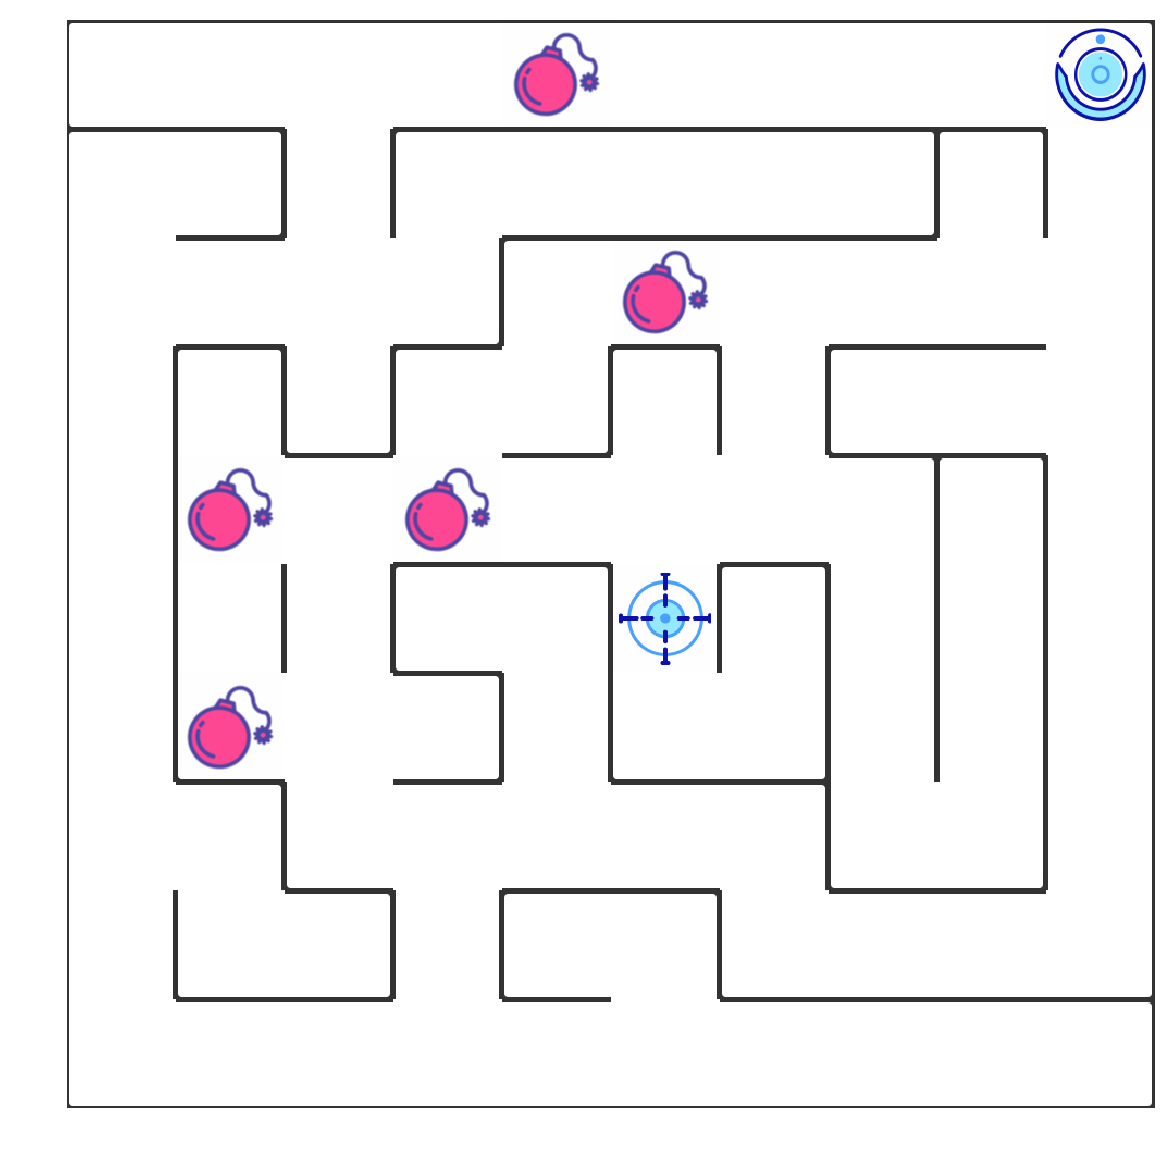

Maze of size (10, 10)

In [50]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示
maze = Maze(maze_size=(10,10))
maze

In [51]:
help(Maze)

Help on class Maze in module Maze:

class Maze(builtins.object)
 |  Maze objects have several main attributes:
 |  - maze_data: wall conditions in every cells are coded as a 4-bit number,
 |      with a bit value taking 0 if there is a wall and 1 if there is no wall.
 |      The 1s register corresponds with a square's top edge, 2s register the
 |      right edge, 4s register the bottom edge, and 8s register the left edge.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, from_file=None, maze_size=None, trap_number=5, unstable_action=False)
 |      You can construct a map from given file or just generating a random one.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  draw_current_maze(self)
 |  
 |  get_raw_maze_img(self)
 |  
 |  is_permissible(self, location, direction)
 |      Returns a boolean designating whether or not a cell is passable in the
 |      given direction. Cell is input as a tuple. Directions is input as single
 |      letter 'u', 'r', 'd', 'l'.
 |  
 

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

In [52]:
# 1 初始化机器人
maze.place_robot()
## place_robot 默认值是第一行最后一个位置，不是help中的 (0.0) 位置
## reset_robot 功能类似

# 2 输出状态
maze.sense_robot()

(0, 9)

(1, 9) d -0.1
(0, 9) u -0.1
(0, 8) l -0.1
(0, 8) d -10.0
(0, 7) l -0.1
(0, 7) d -10.0
(0, 7) d -10.0
(0, 7) d -10.0
(0, 6) l -0.1
(0, 7) r -0.1
[-0.1, -0.1, -0.1, -10.0, -0.1, -10.0, -10.0, -10.0, -0.1, -0.1]


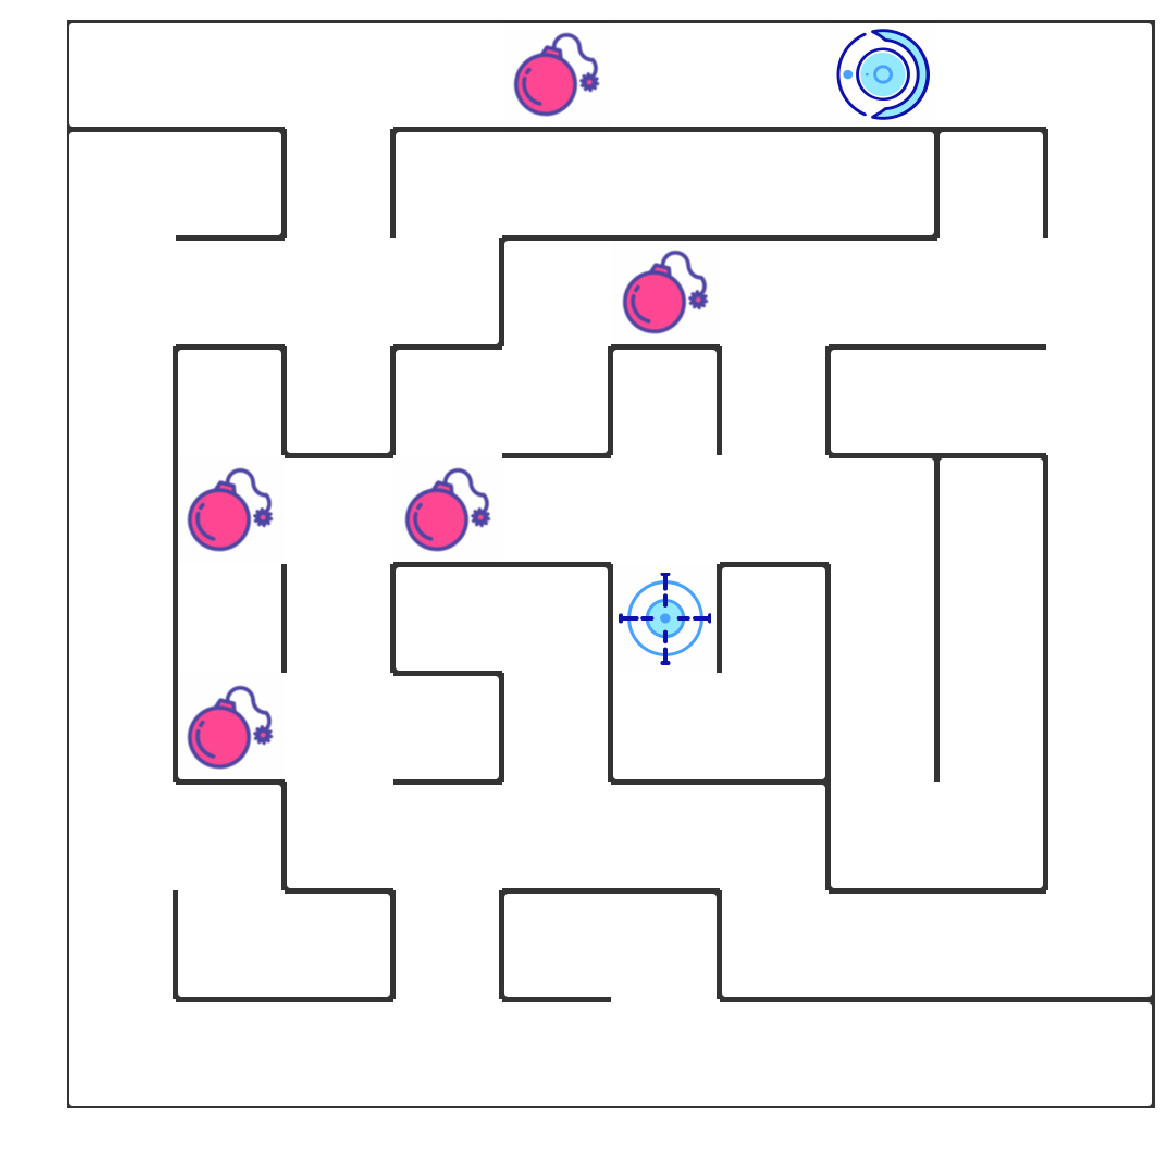

Maze of size (10, 10)


In [53]:
# v3 updata Q5
# choose action 是带default = 0.5 epsilon 的函数
# 要想实现随机，需要对函数传入 epsilon = 1 ，确保全随机
reward_list = []
maze.place_robot()

for i in range(10):
    action = choose_action(1)
    reward = maze.move_robot(action)
    ## move_robot 的输出值为移动后位置的奖励值
    print(maze.sense_robot(), action, reward)
    ## 检查机器人位置和奖励
    reward_list.append(reward)
    ## 将奖励记录到列表里

## 打印reward_list
print(reward_list)
## 打印迷宫，观察机器人位置
print(maze)

(0, 8) -0.1
(0, 9) -0.1
(0, 9) -10.0
(0, 9) -10.0
(0, 9) -10.0
(0, 8) -0.1
(0, 8) -10.0
(0, 8) -10.0
(0, 8) -10.0
(0, 8) -10.0
[-0.1, -0.1, -10.0, -10.0, -10.0, -0.1, -10.0, -10.0, -10.0, -10.0]


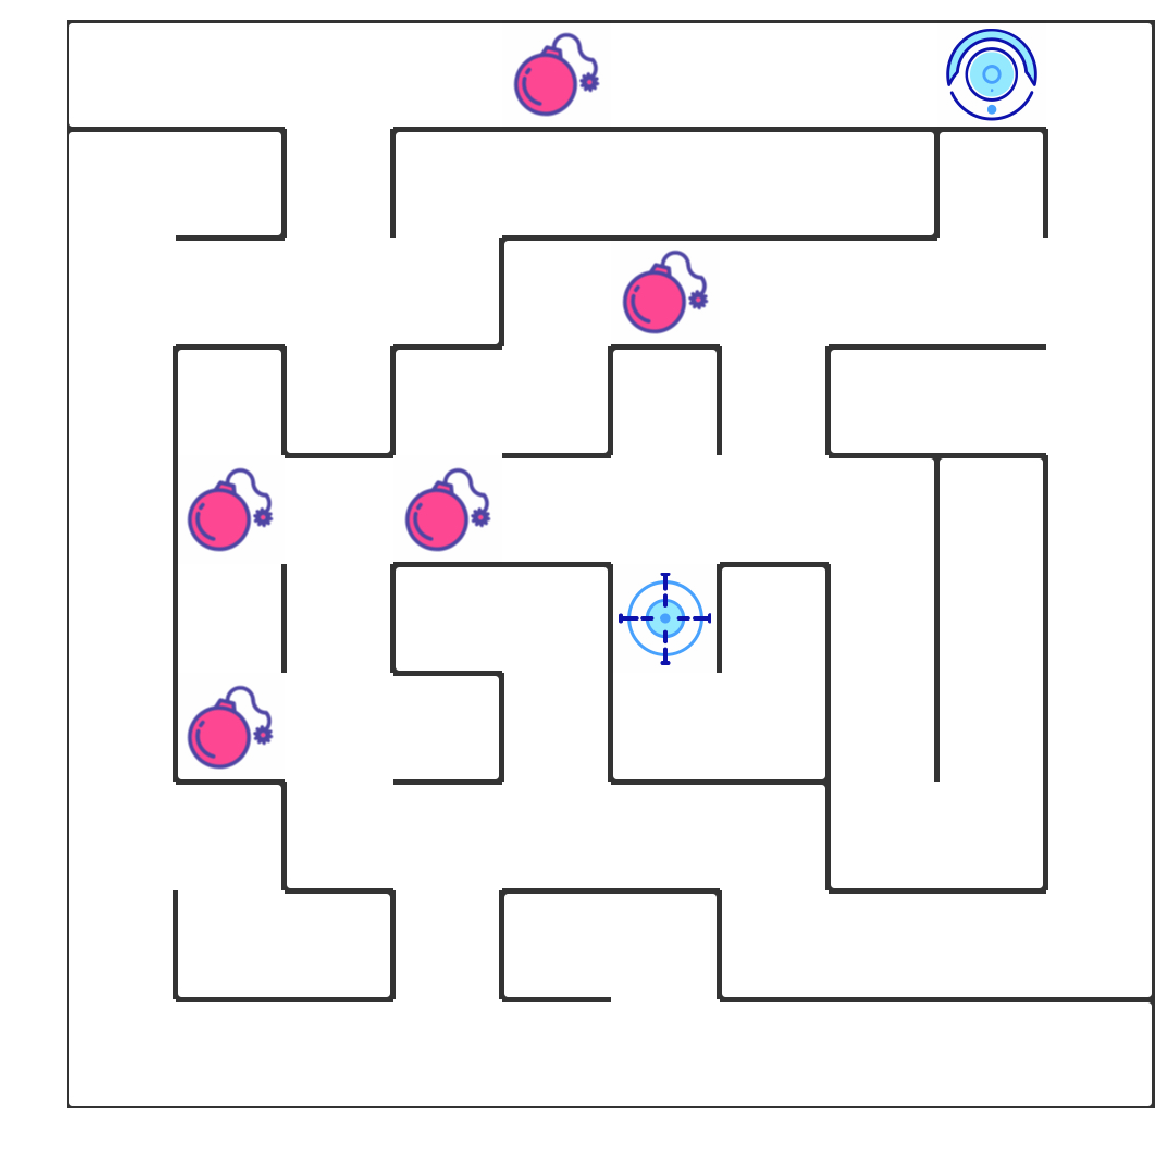

Maze of size (10, 10)


In [54]:
# v2 archive
# 循环10次进行测试
reward_list = []
## 设定存放奖励的列表
maze.place_robot()
## 初始化机器人位置

# 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    reward = maze.move_robot(choose_action())
    ## move_robot 的输出值为移动后位置的奖励值
    print(maze.sense_robot(), reward)
    ## 检查机器人位置和奖励
    reward_list.append(reward)
    ## 将奖励记录到列表里

## 打印reward_list
print(reward_list)
## 打印迷宫，观察机器人位置
print(maze)

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



In [55]:
class Robot(object):

    def __init__(self, maze, alpha=0.5, gamma=0.9, epsilon0=0.5):

        self.maze = maze
        ## 继承生成的maze
        self.valid_actions = self.maze.valid_actions
        ## 继承maze中的动作
        self.state = None
        self.action = None

        # Set Parameters of the Learning Robot
        self.alpha = alpha
        ## alpha是学习率，就是新结果更新到Q-Table的比率
        self.gamma = gamma
        ##  gamma是对未来奖励的惩罚
        self.epsilon0 = epsilon0
        self.epsilon = epsilon0
        ## epsilon是贪婪算法的随机率
        ## 初始值为 epsilon0
        self.t = 0
        ## epsilon 更新的次数

        self.Qtable = {}
        ## 初始化空的Qtable
        self.reset()

    def reset(self):
        """
        Reset the robot
        """
        self.state = self.sense_state()
        self.create_Qtable_line(self.state)

    def set_status(self, learning=False, testing=False):
    ## 设定 learning 和 testing 两种过程状态参数
        """
        Determine whether the robot is learning its q table, or
        exceuting the testing procedure.
        """
        self.learning = learning
        self.testing = testing

    def update_parameter(self):
        """
        Some of the paramters of the q learning robot can be altered,
        update these parameters when necessary.
        """
        if self.testing:
            # TODO 1. No random choice when testing
            ## 如果是 testing 的参数是 True，不更新 epsilon
            ## 直接pass
            pass
        else:
            # TODO 2. Update parameters when learning
            self.t = self.t +1
            ## t的记数加1
            if self.epsilon < 0.025:
                self.epsilon = self.epsilon - self.t*0.2
                ## 当 epsilon 比较小的时候，Qtable接近完美值
                ## 增加衰减，迅速减少随机探索比率
            else:
                self.epsilon = self.epsilon - self.t*0.1
                ## 当 epsilon 在 epsilon0 和 0.25 之间，Qtable还比较不完善
                ## 保持比较低的衰减，缓速减少随机探索比率
        return self.epsilon

    def sense_state(self):
        """
        Get the current state of the robot. In this
        """

        # TODO 3. Return robot's current state
        return self.maze.sense_robot()
        # 获得机器人位置

    def create_Qtable_line(self, state):
        """
        Create the qtable with the current state
        """
        # TODO 4. Create qtable with current state
        # Our qtable should be a two level dict,
        # Qtable[state] ={'u':xx, 'd':xx, ...}
        # If Qtable[state] already exits, then do
        # not change it.
        if state in self.Qtable:  
        # Qtable是字典，调用字典的键值查找属性，如果有，什么都不做
            pass
        else:
            self.Qtable.setdefault(state, {a: 0.0 for a in self.valid_actions})
            ## 使用了字典的 setdefault 方法，使用了这一方法后，就不需要判断 state 是否是 Qtable 的 key 了
            ## ---v2 archive---
            ## self.Qtable[state] = {'u':0.0, 'r':0.0, 'd':0.0, 'l':0.0} 
            ## 没有的话，新增一个状态，赋值为0.0(float)

    def choose_action(self):
        """
        Return an action according to given rules
        """
        def is_random_exploration():

            # TODO 5. Return whether do random choice
            # hint: generate a random number, and compare
            # it with epsilon
            return np.random.random() < self.epsilon
            ## 将之前的 choose_action 的判断放到这里
            
        if self.learning:
        ## 如果是学习状态
            if is_random_exploration():
                # TODO 6. Return random choose aciton
                action = np.random.choice(self.valid_actions)
                return action
            else: 
                # TODO 7. Return action with highest q value
                action = max(self.Qtable[self.state], key=self.Qtable[self.state].get)
                return action
        elif self.testing:
            # TODO 7. choose action with highest q value
            action = max(self.Qtable[self.state], key=self.Qtable[self.state].get)
            return action
        else:
            # TODO 6. Return random choose aciton
            action = random.choice(self.valid_actions)
            return action
        ## 此处感觉可以简化为 else 直接使用最大值（测试），去掉 elseif

    def update_Qtable(self, r, action, next_state):
        """
        Update the qtable according to the given rule.
        """
        if self.learning:
            # TODO 8. When learning, update the q table according
            # to the given rules
            current = self.Qtable[self.state][action]
            
            # q_target = r + self.gamma * float(max(self.Qtable[next_state].values()))
            # target = r + self.gamma * (max(self.Qtable[next_state].values()))
            target = r + self.gamma * (max(self.Qtable[next_state].values()))
            ## 更新后的目标值是在这一步获得的 r 上增加后续的值
            ## gamma 是对未来的惩罚，r 是输入的这步的 reward
            
            self.Qtable[self.state][action] = current + self.alpha * (target - current)
            ## v3
            ## 此处等号前面不能用 current 变量，会导致无法更新 Qtalbe，原因后续研究
            
            ## v2归档，1-a 的参数是不需要的
            ## self.Qtable[self.state][action] = (1-self.alpha) * self.Qtable[self.state][action] + self.alpha * (target - current)
            ## 根据学习率 alpha，更新Q值

    def update(self):
        """
        Describle the procedure what to do when update the robot.
        Called every time in every epoch in training or testing.
        Return current action and reward.
        """
        self.state = self.sense_state() 
        # Get the current state
        ## 获得机器人的位置
        
        self.create_Qtable_line(self.state) 
        # For the state, create q table line
        ## 获得现在的Qtable

        action = self.choose_action() 
        # choose action for this state
        ## 选择一个方向
        
        reward = self.maze.move_robot(action) 
        # move robot for given action
        ## 移动机器人并将这步的奖励值赋给reward

        next_state = self.sense_state() 
        # get next state
        ## 获得新的位置（因为上面已经move过了）
        
        self.create_Qtable_line(next_state) 
        # create q table line for next state
        ## 初始化下一步的Qtable

        if self.learning and not self.testing:
            ## 如果是学习状态
            self.update_Qtable(reward, action, next_state) 
            # update q table
            ## 更新Qtable
            self.update_parameter() 
            # update parameters
            ## 更新参数

        return action, reward
        # 返回这步的方向和得到的奖励

<center><a id='qtable'>/更新qtable解释(v3)/</a></center>

- 之前对old值前面乘了 （1-a）系数，更新为：a 只对应于后面更新的内容，平缓学习的作用。课程中的公式对应这里：
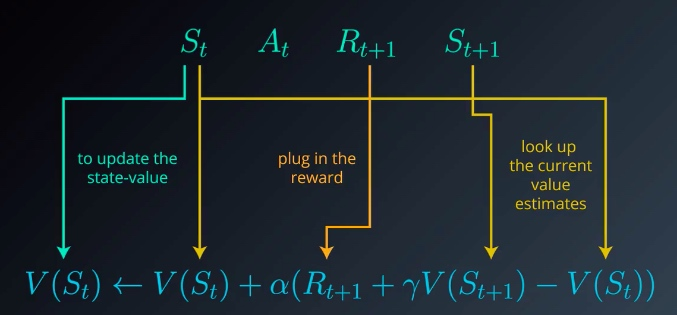
- 之前前面使用的（1-a）系数在反馈的wiki中也有提到：[/Q-Learning(wiki)/](https://en.wikipedia.org/wiki/Q-learning)
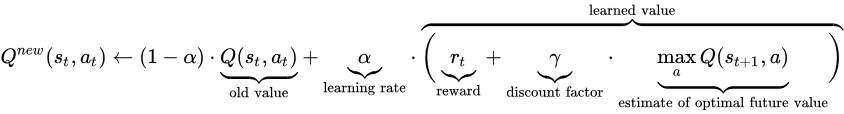，其实这两个公式是等价的，只不过做了变换。
- 又学习了下wiki，发现有不少 Q-learning 的变化版，比如 Double Q-Learning：
    - Double Q-learning：解决的是噪音带来的干扰（交叉使用Qtablea和Qtableb。


    - 还能和深度学习结合，后续深入

> 评审老师的反馈：
* 在如下所示 [Q-learning](https://en.wikipedia.org/wiki/Q-learning) 更新公式中，它考虑了两部分的信息：之前学习到的Q值，以及新学习到Q值。  
[![pic1](https://wikimedia.org/api/rest_v1/media/math/render/svg/390d024c2ee2a2c2f709642401a3a7b44f7b2e4e)](https://wikimedia.org/api/rest_v1/media/math/render/svg/390d024c2ee2a2c2f709642401a3a7b44f7b2e4e)
* 在新学习到的Q值中，`γ*maxQ` 的一项目就考虑了所谓的「未来奖励」——这是强化学习中的一个巨大亮点。也就是说，我们在计算、衡量一个动作的时候，不仅考虑它当前一步获得的奖励 `r`，还要考虑它执行这个动作之后带来的累计奖励——这能够帮助我们更好地衡量一个动作的好坏。但是这时候机器人并没有真正地往前走，而是使用Qtable 中原有地 next_state 的值来估计这个未来奖励。
* 其中 γ 是折扣因子，是一个(0,1)之间的值。一般我们取0.9，能够充分地对外来奖励进行考虑。如果这个值大于1，那么实际上未来奖励会发散开来（因为这是一个不断累加、迭代的过程），导致Qtable不能发散。它能够帮助终点处的正奖励“扩散”到周围，也就是说，这样机器人更能够成功地学习到通往终点的路径。

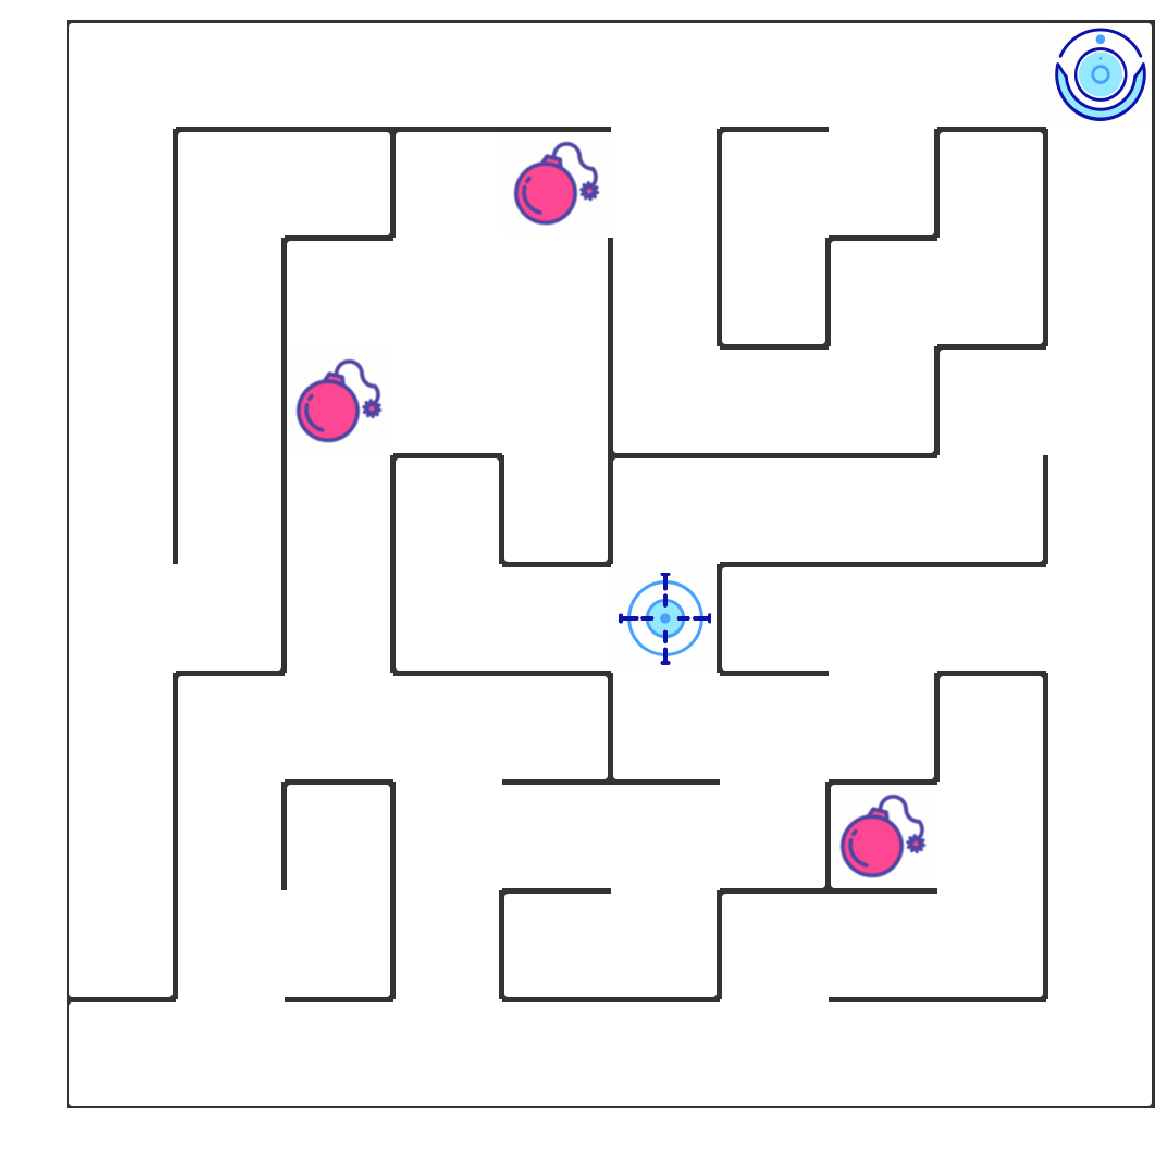

Maze of size (10, 10)

In [56]:
## 有时候maze生成的比较奇怪，需要多运行几次调一个比较合理的
## 减少 trap 数量可以很快得到理想的迷宫
maze = Maze(maze_size=(10,10), trap_number=3)
maze

In [57]:
# from Robot import Robot
Robot(maze).set_status(learning=True,testing=False)
## 为了以后复习方便，上面代码框已经集成了Robot的内容
## 测试一下没有报错

---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

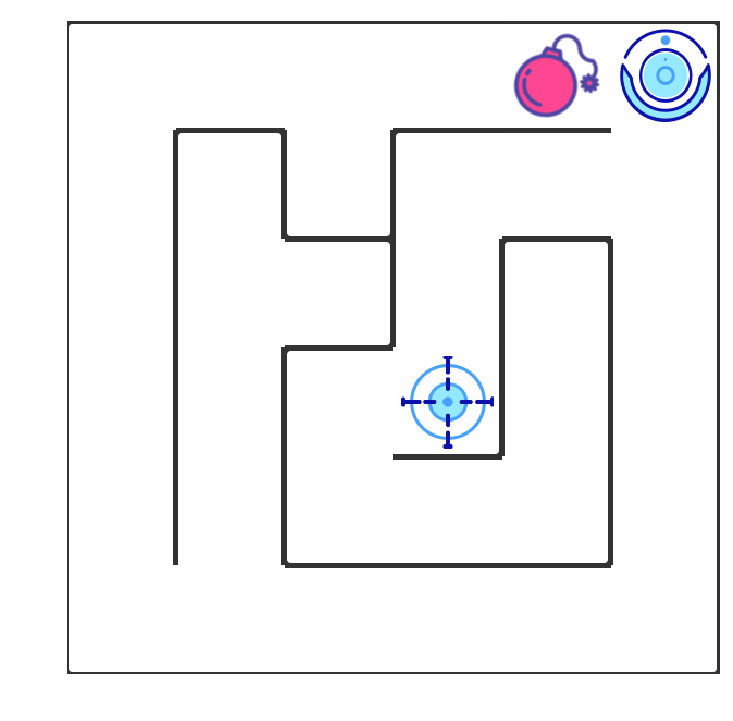

Maze of size (6, 6)


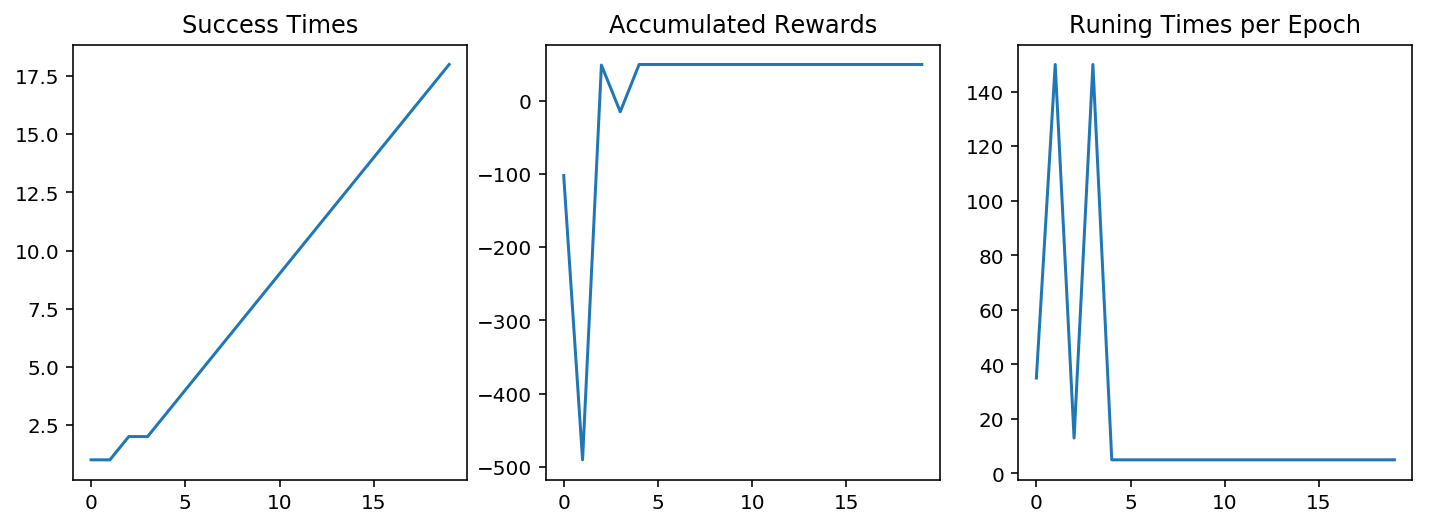

CPU times: user 897 ms, sys: 38.2 ms, total: 935 ms
Wall time: 1.03 s


In [58]:
%%time
# run1 - test run
## 先跑个简单的，关闭录像功能
from Runner import Runner

## 可选的参数：
epoch = 20
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (6,6)
trap_number = 1

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner1 = Runner(r, g)
runner1.run_training(epoch, display_direction=True)
# runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。
print(g)
runner1.plot_results()

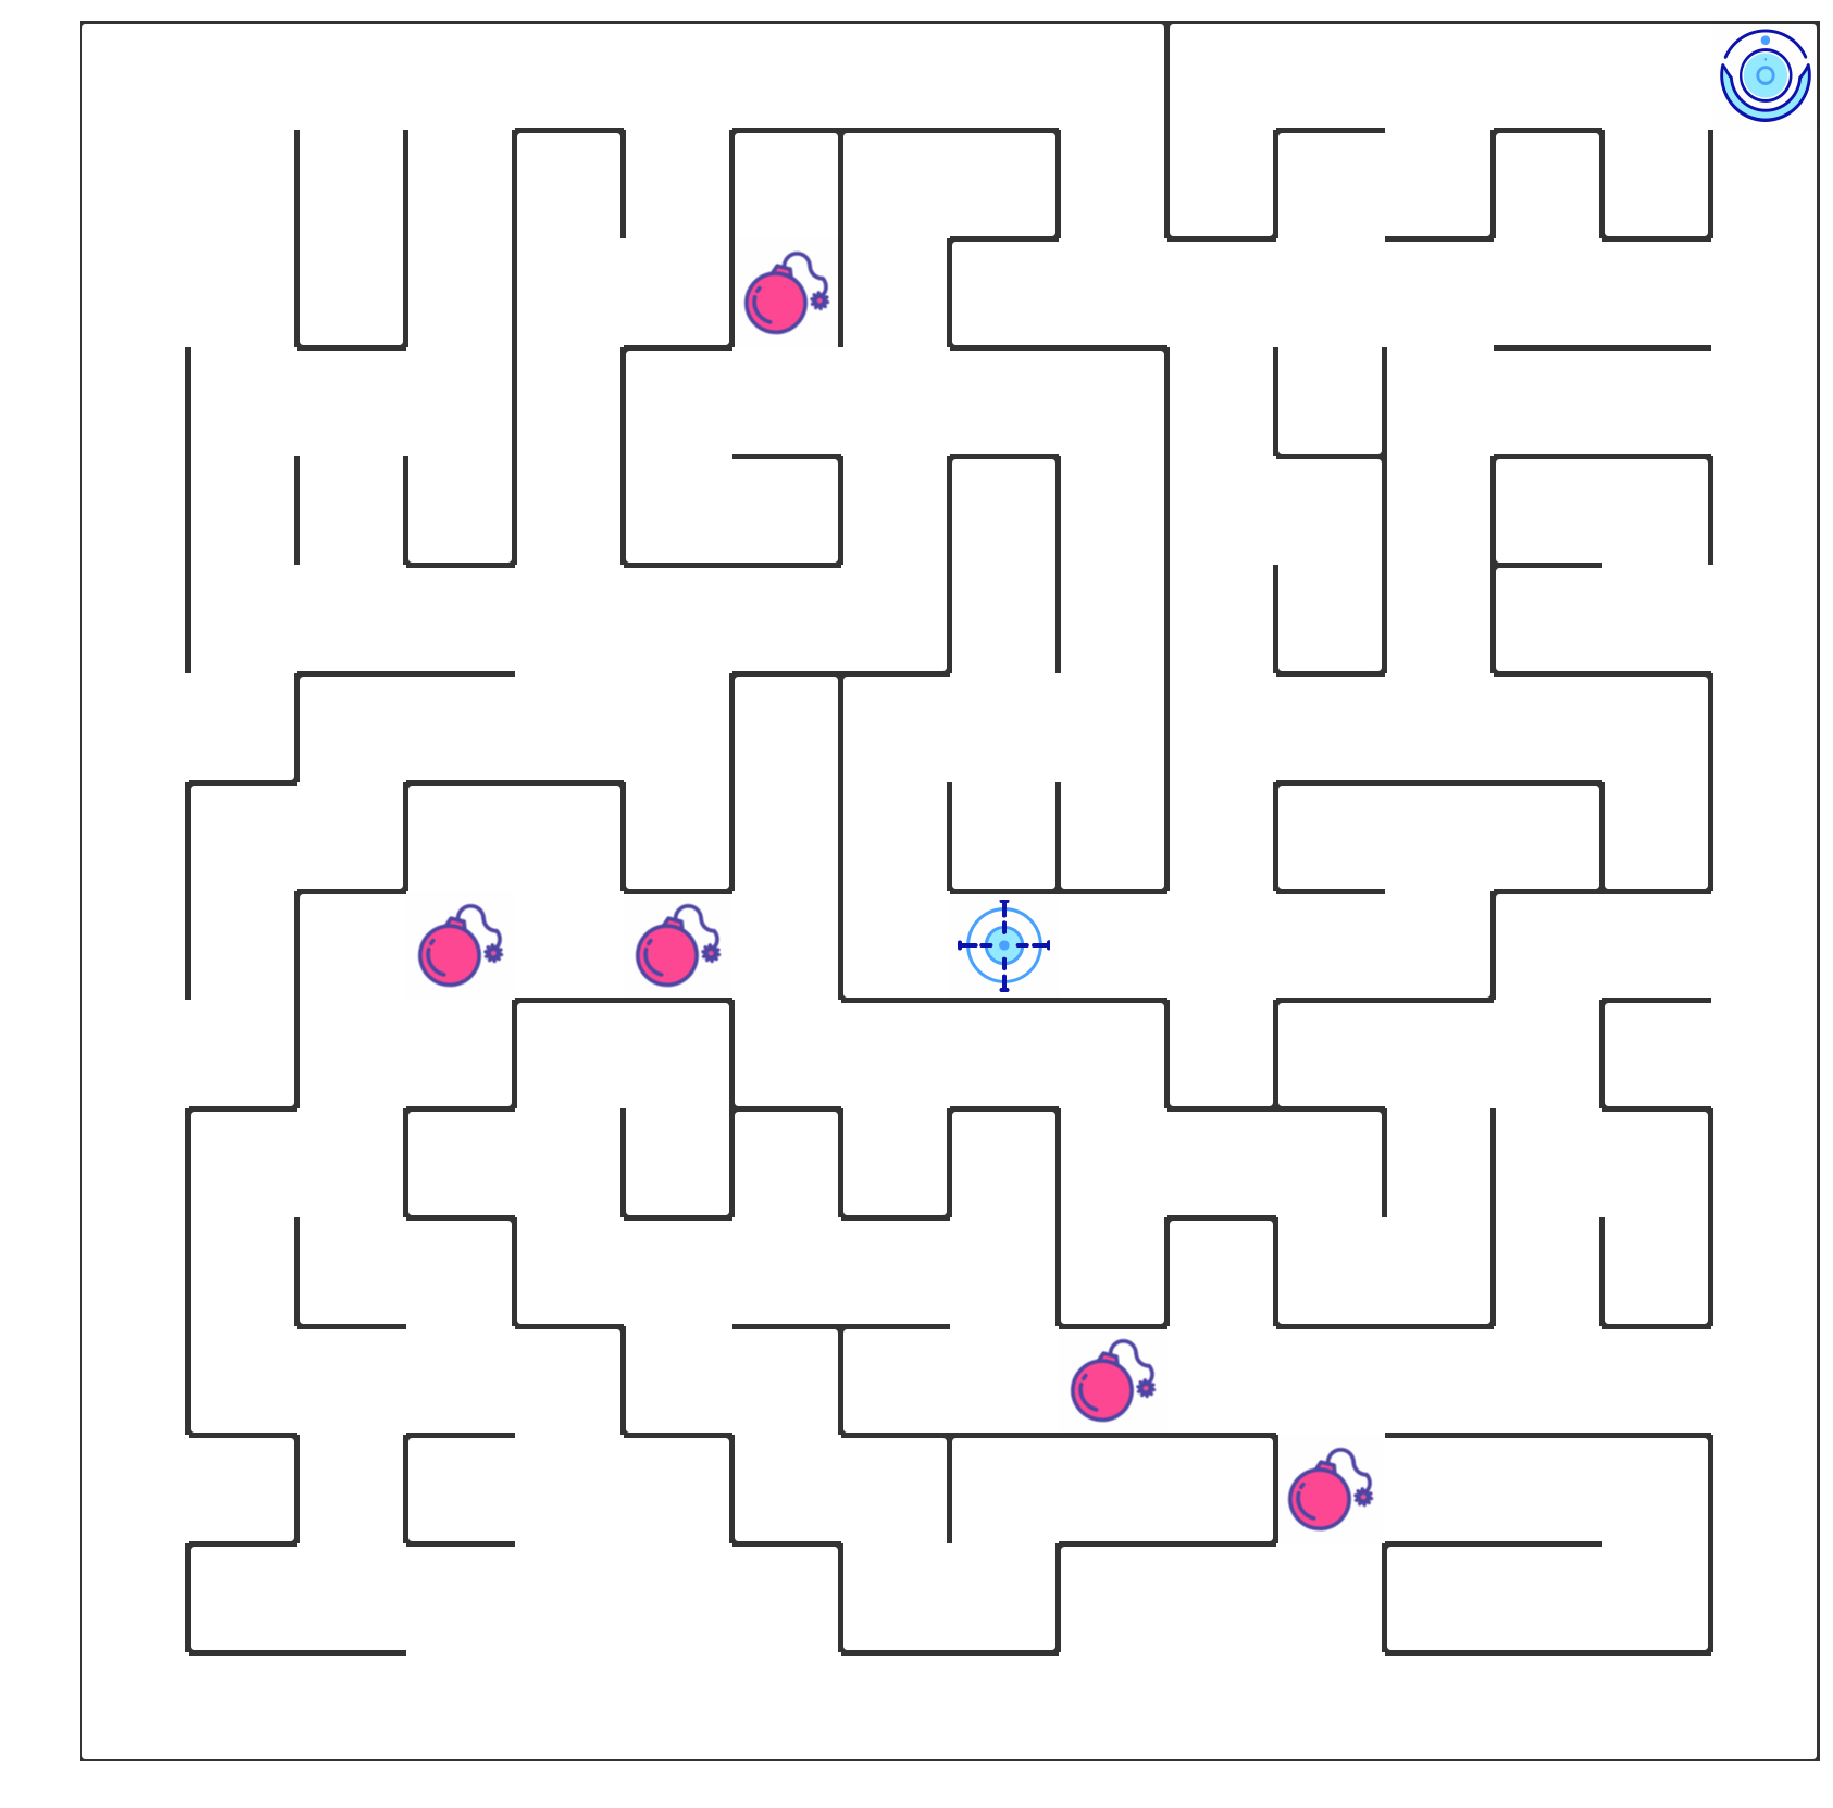

Maze of size (16, 16)


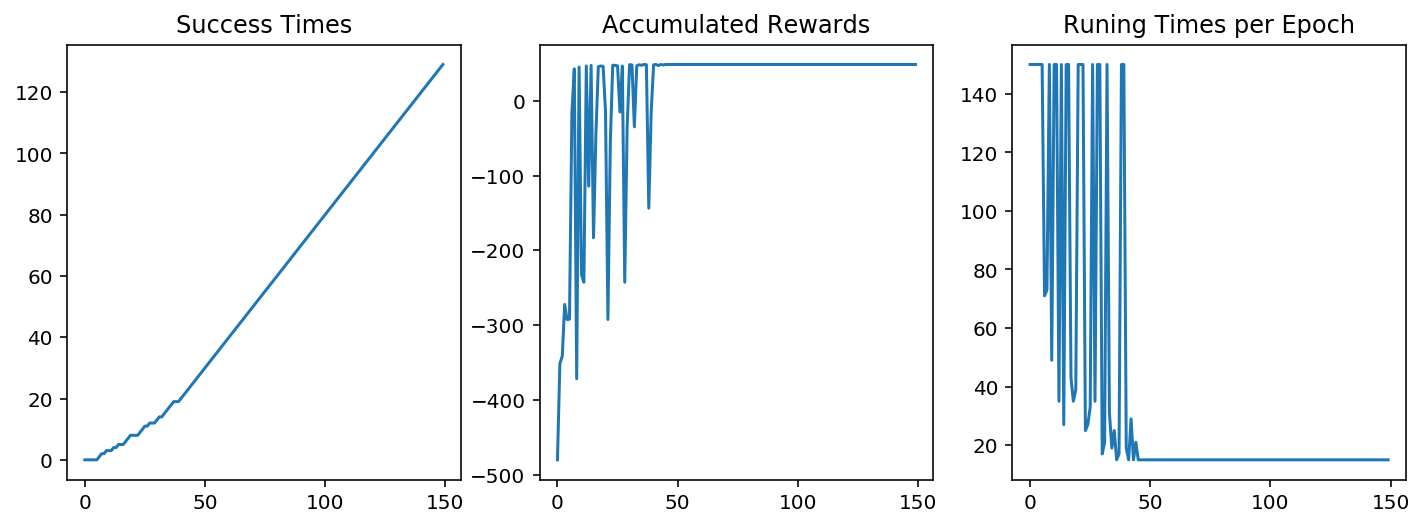

CPU times: user 14.6 s, sys: 1.64 s, total: 16.2 s
Wall time: 16.6 s


In [59]:
%%time
# run2a -  basic
epoch = 150
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 5

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner2a = Runner(r, g)
runner2a.run_training(epoch, display_direction=True)
print(g)
runner2a.plot_results()

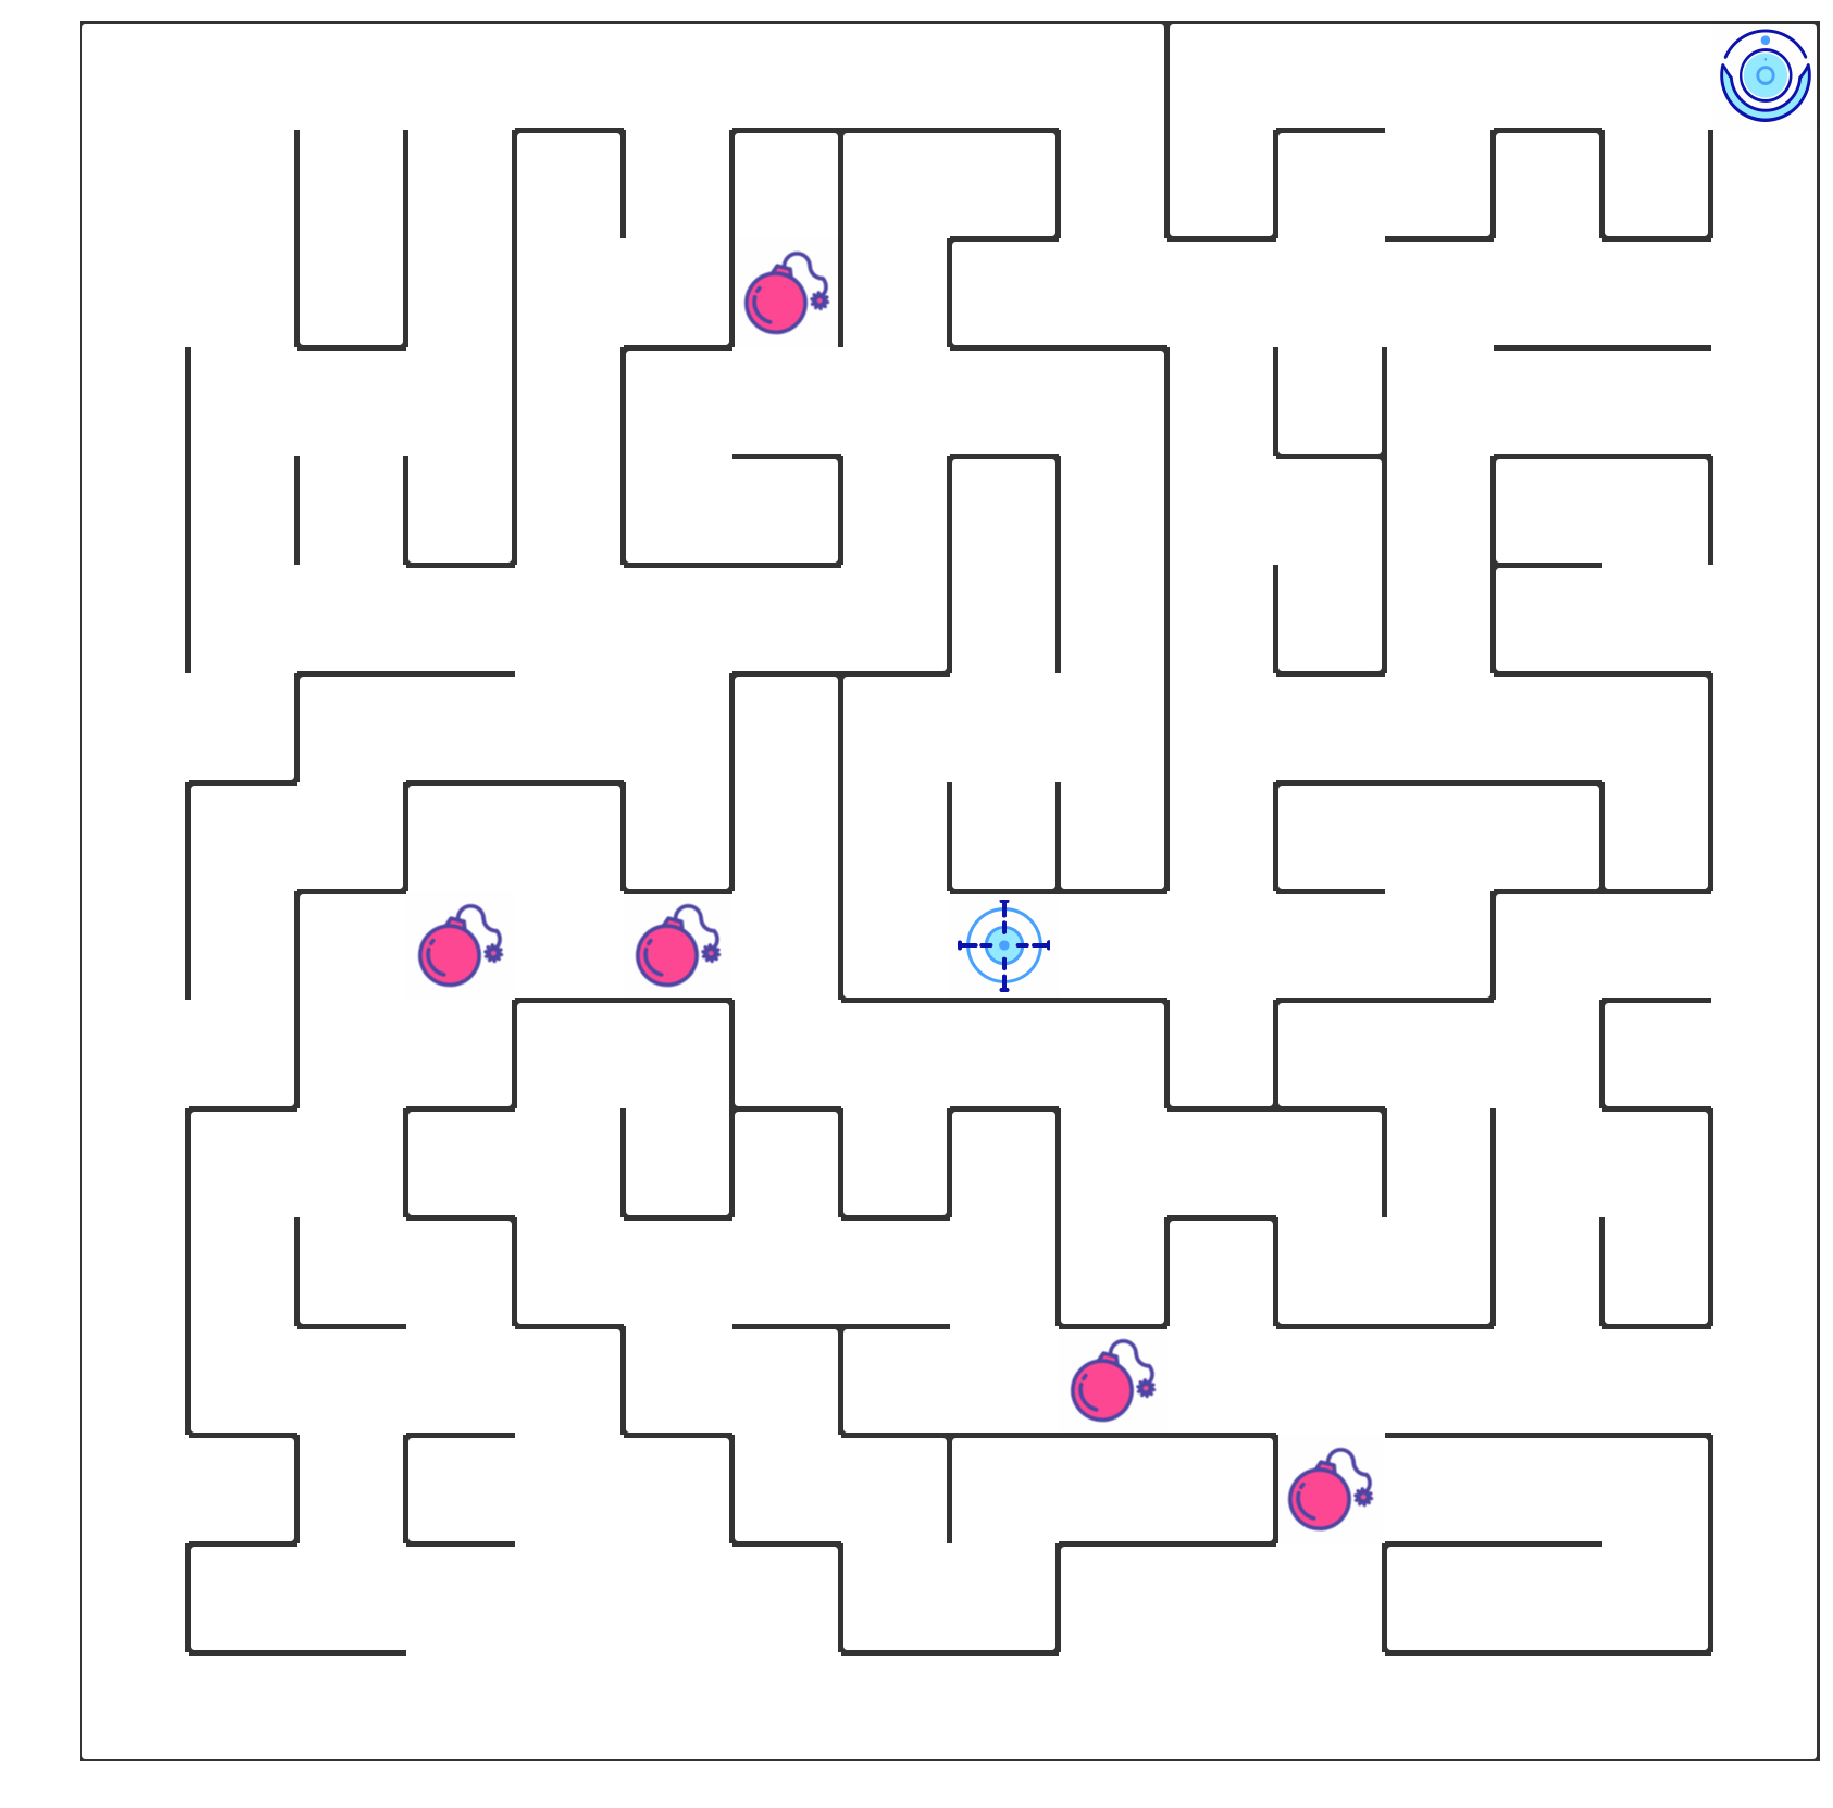

Maze of size (16, 16)


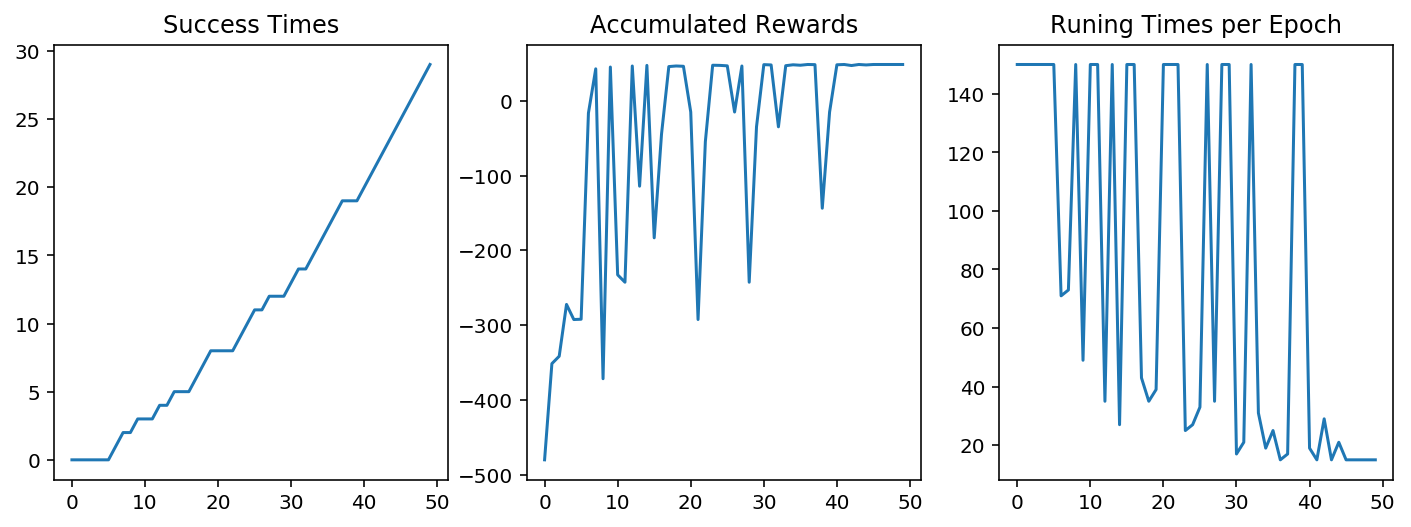

CPU times: user 9.84 s, sys: 448 ms, total: 10.3 s
Wall time: 10.5 s


In [60]:
%%time
# run2b -  basic + small epoch
epoch = 50
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 5

# g = Maze(maze_size=maze_size,trap_number=trap_number)
## 使用同一个maze
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner2b = Runner(r, g)
runner2b.run_training(epoch, display_direction=True)
print(g)
runner2b.plot_results()

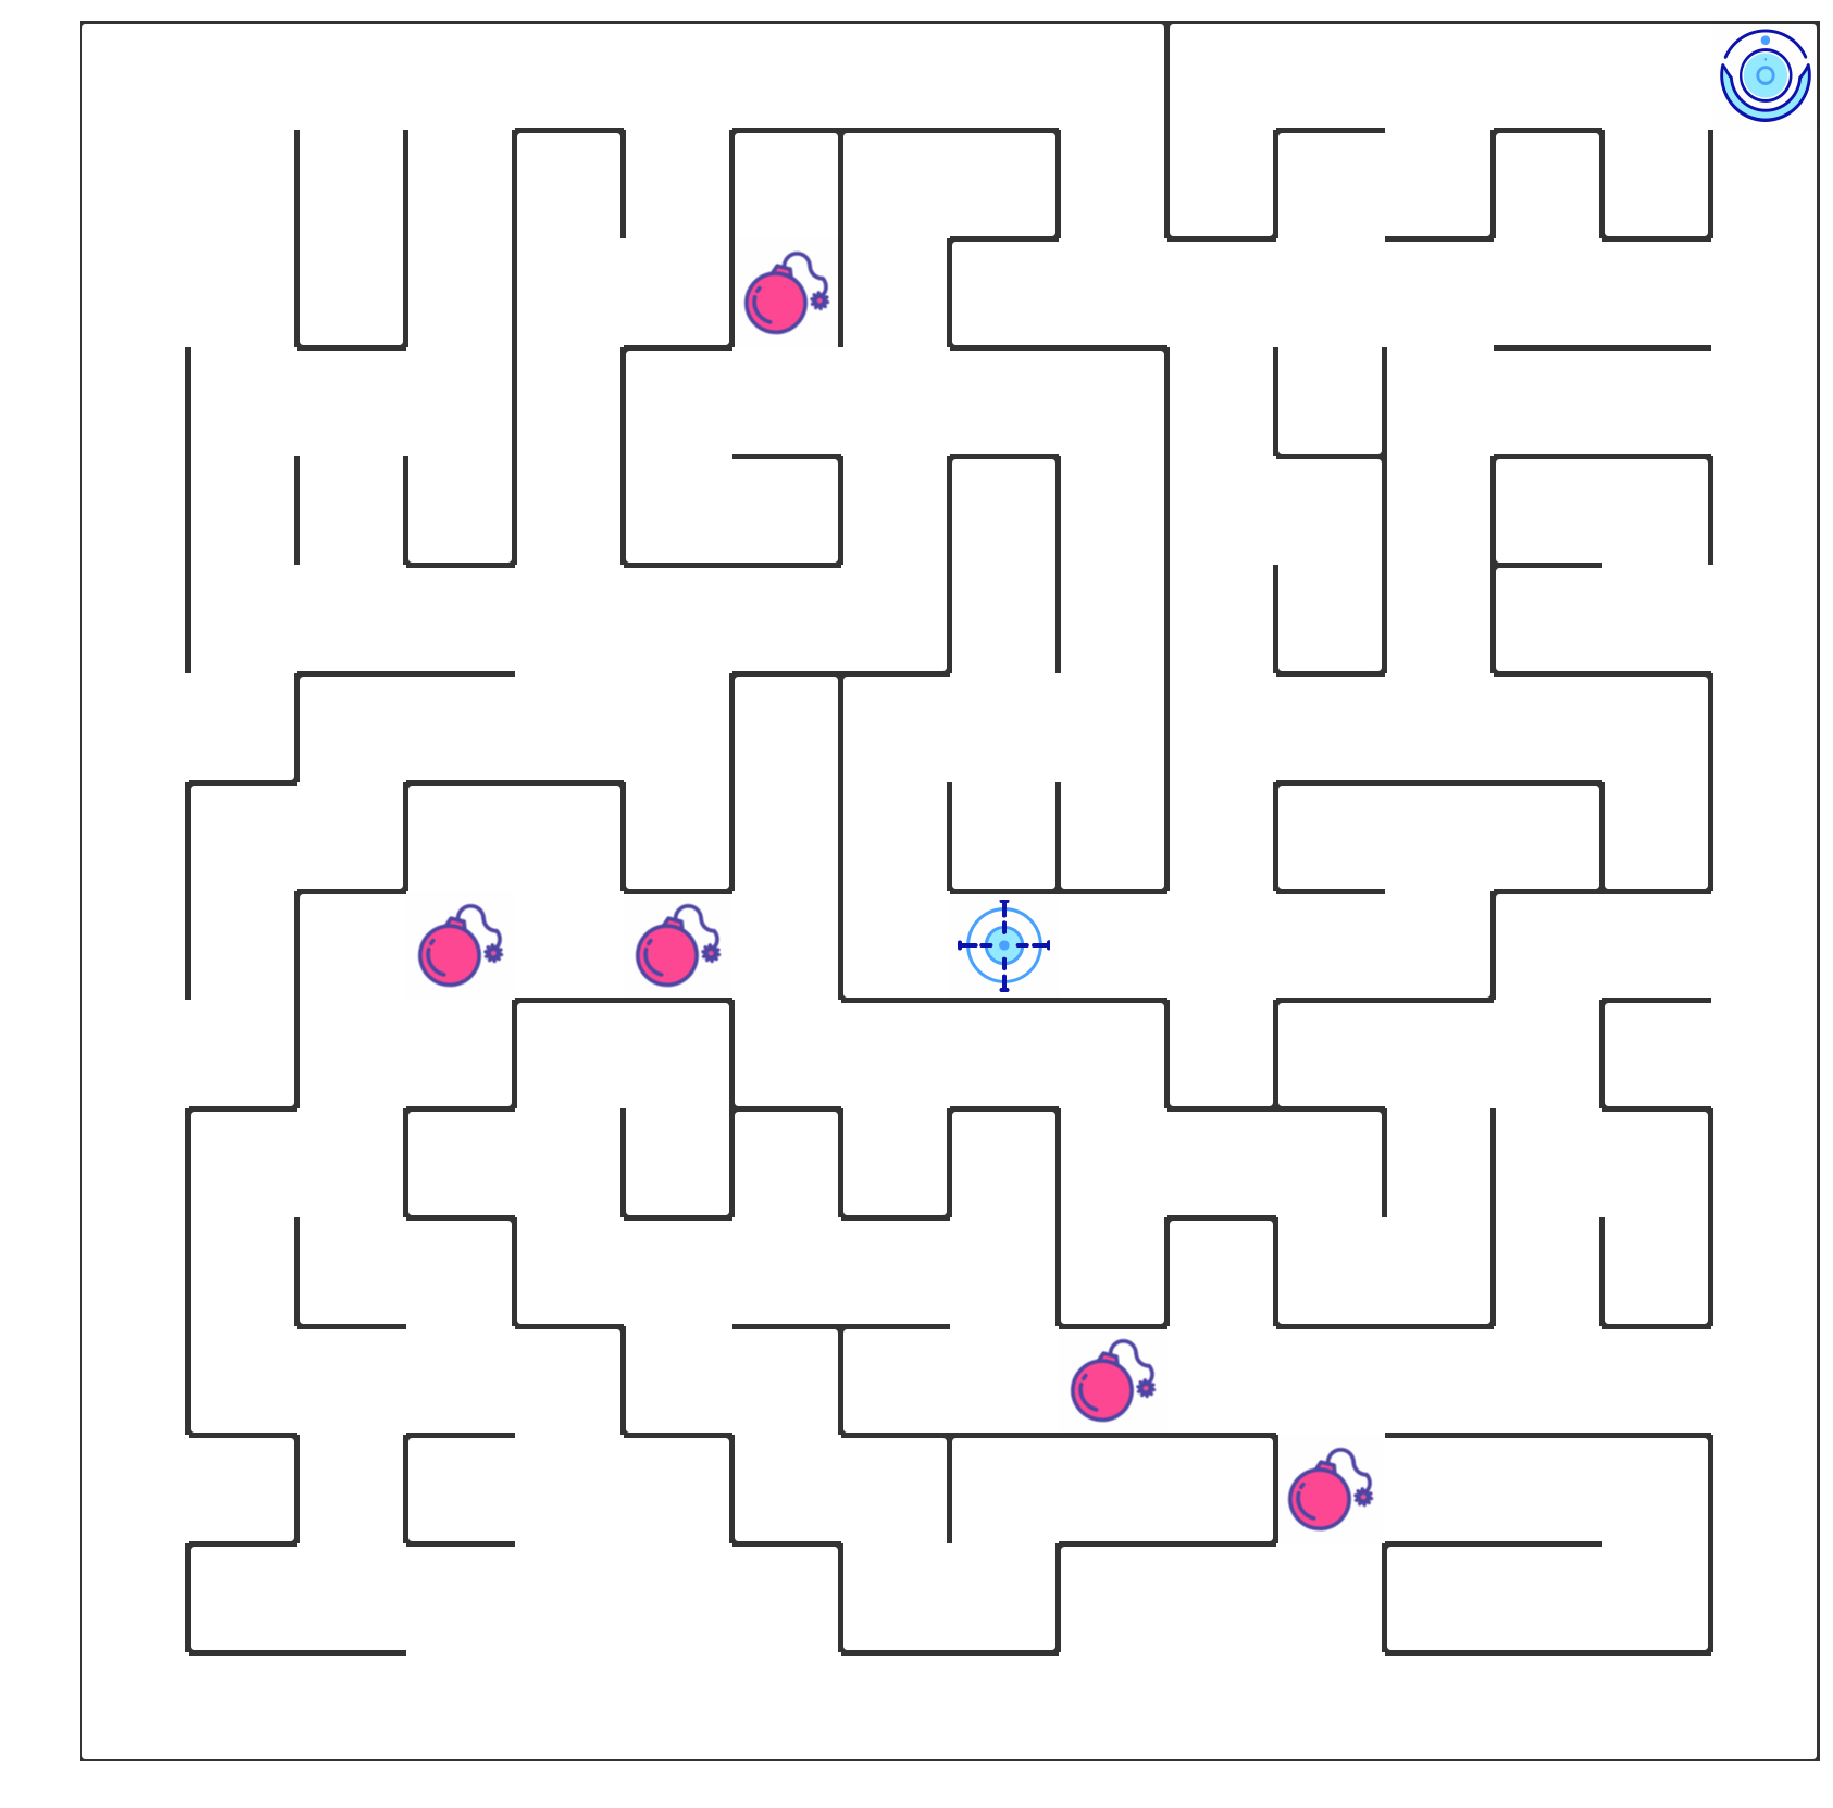

Maze of size (16, 16)


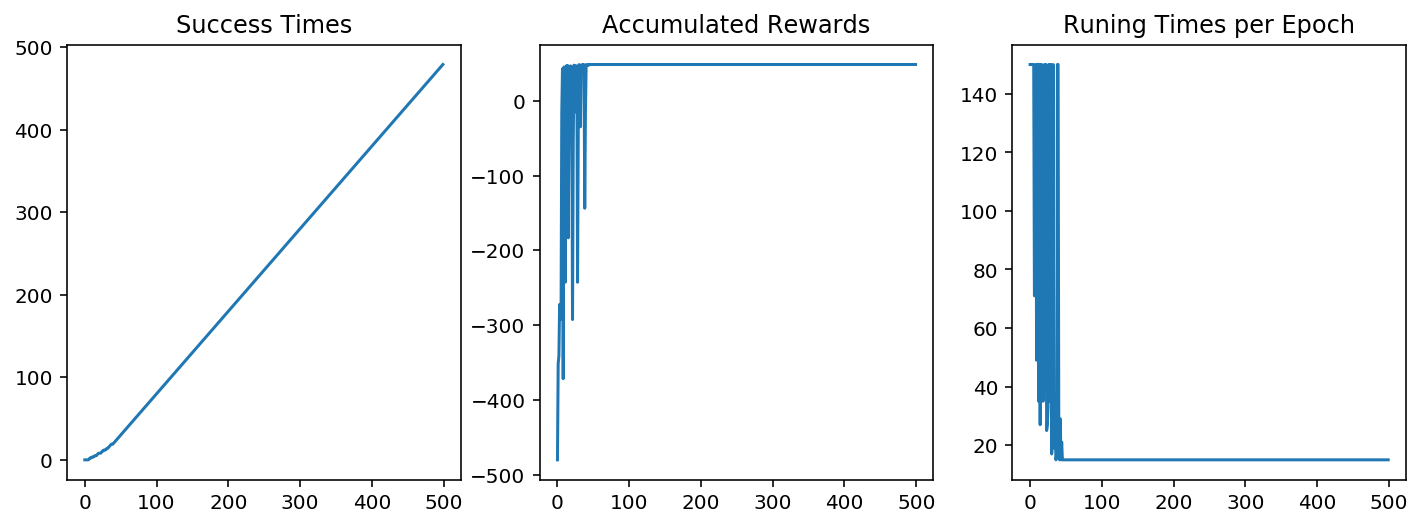

CPU times: user 28 s, sys: 1.22 s, total: 29.2 s
Wall time: 29.3 s


In [61]:
%%time
# run2c -  basic + large epoch
epoch = 500
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 5

# g = Maze(maze_size=maze_size,trap_number=trap_number)
## 使用同一个maze
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner2c = Runner(r, g)
runner2c.run_training(epoch, display_direction=True)
print(g)
runner2c.plot_results()

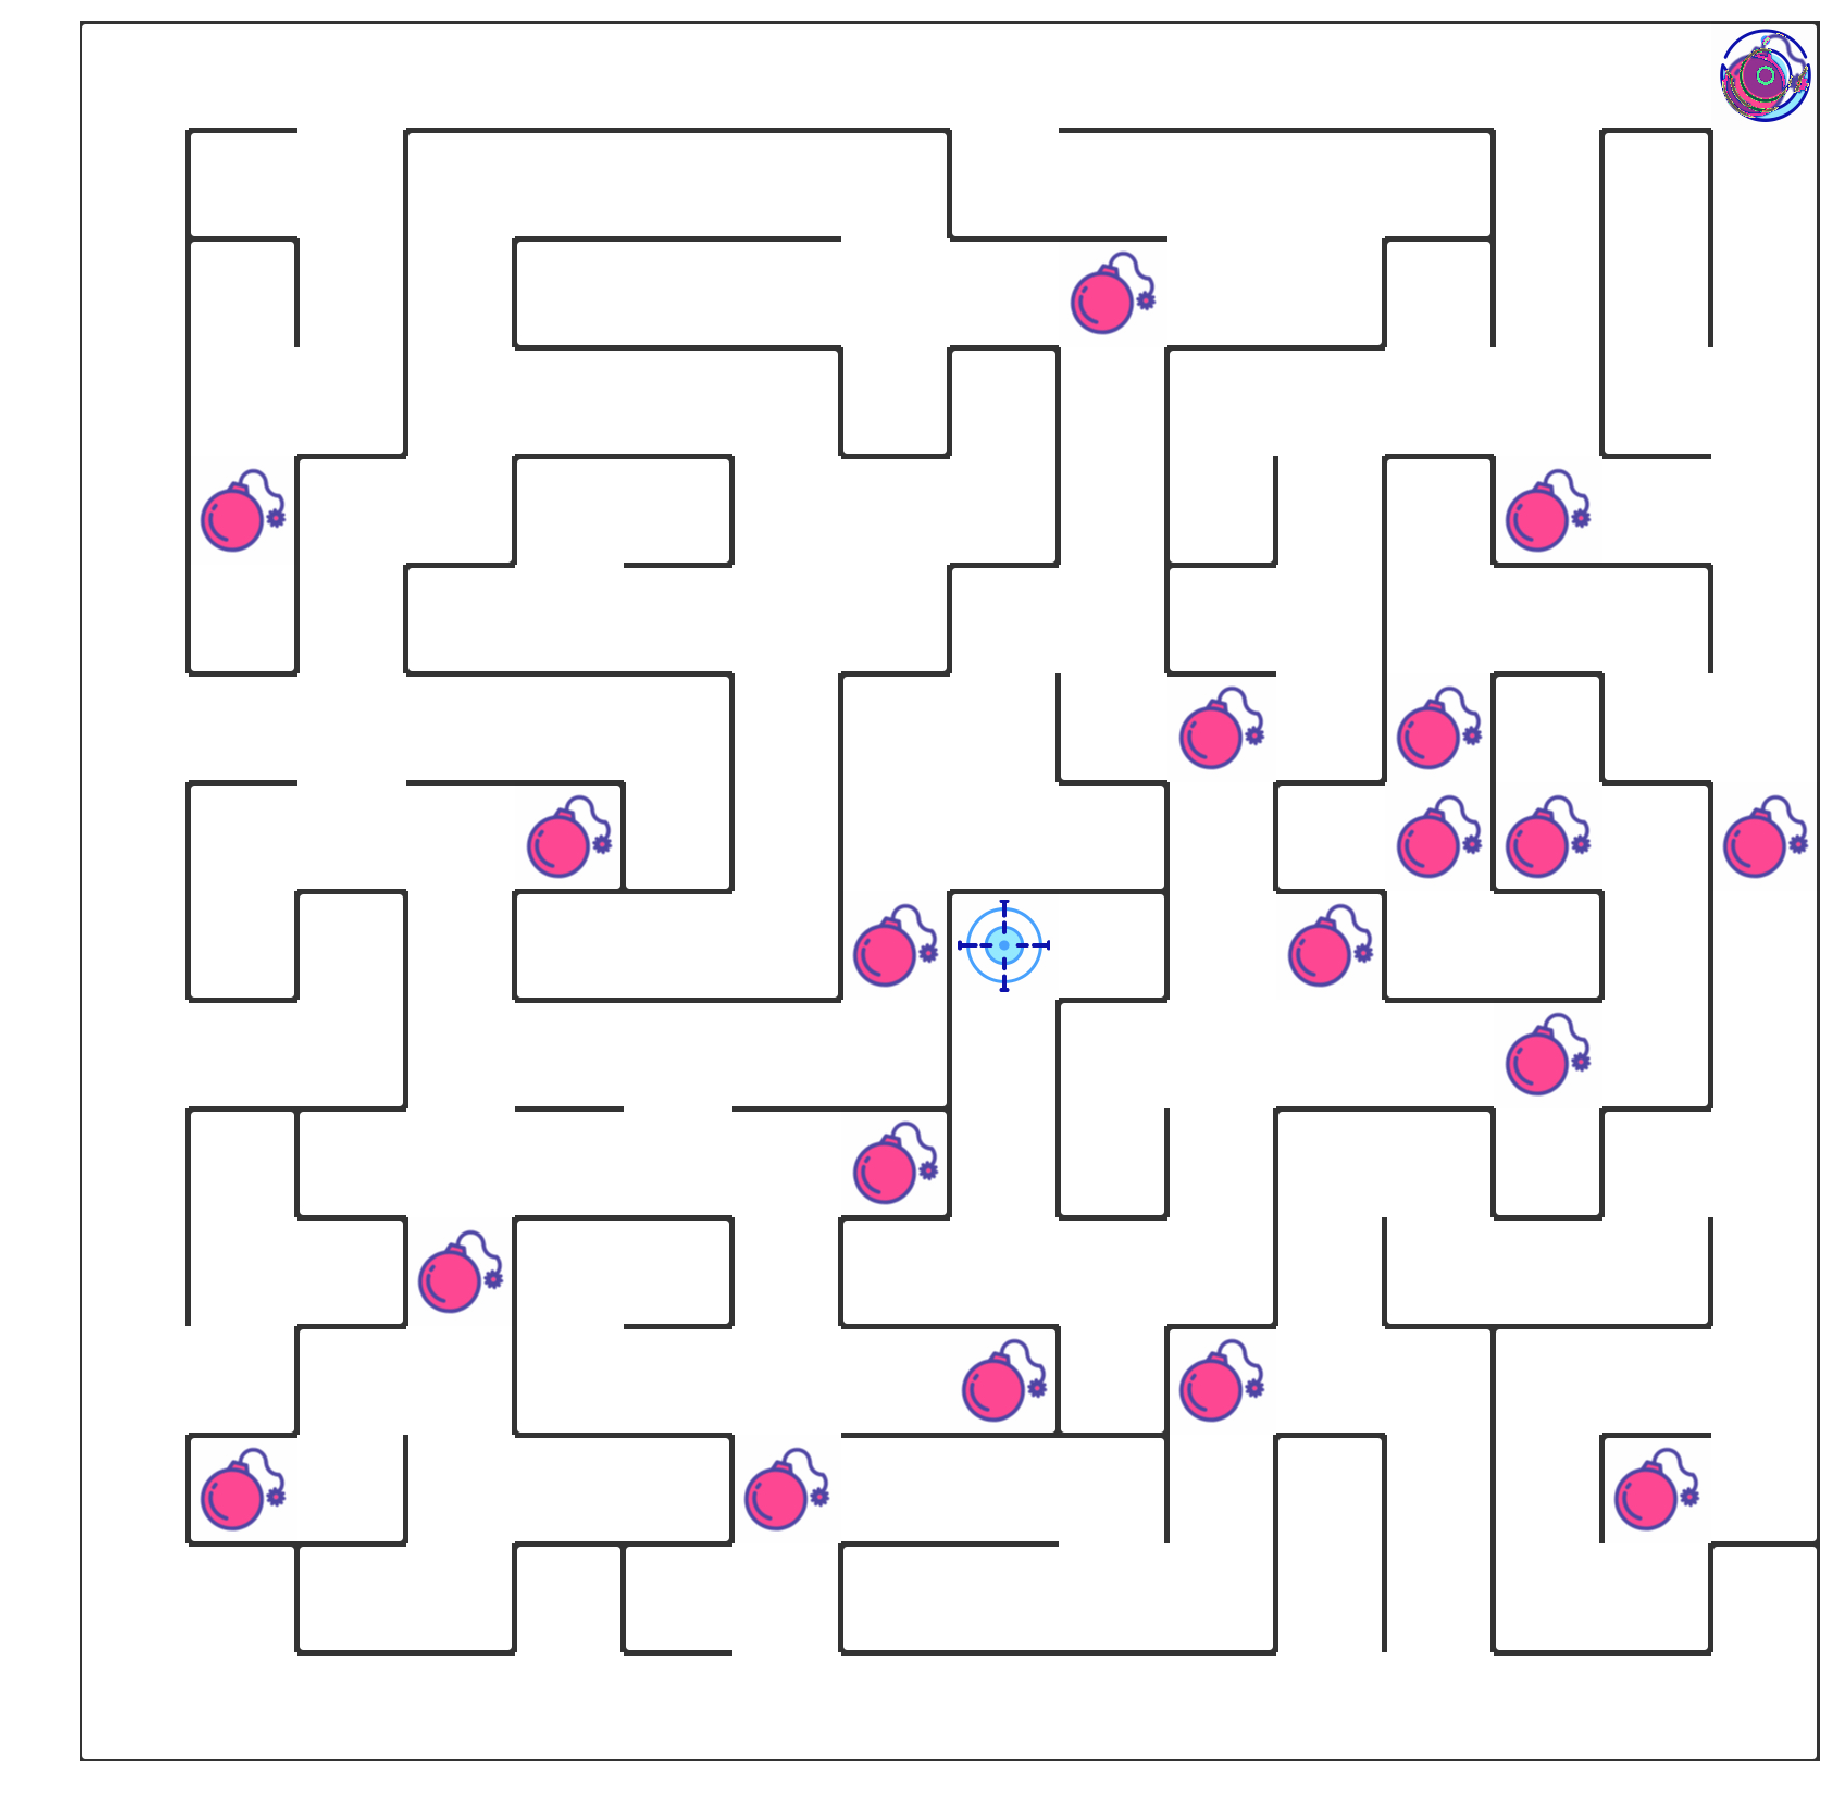

Maze of size (16, 16)


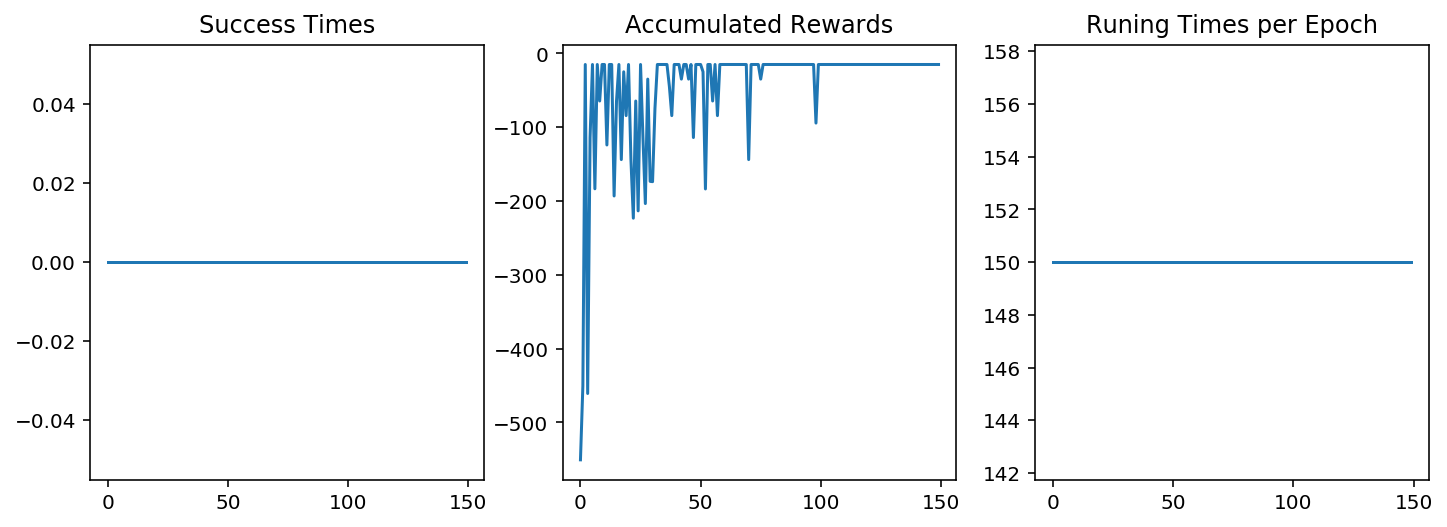

In [62]:
# run3 -  more trap
epoch = 150
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (16,16)
trap_number = 20

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner3 = Runner(r, g)
runner3.run_training(epoch, display_direction=True)
print(g)
runner3.plot_results()

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

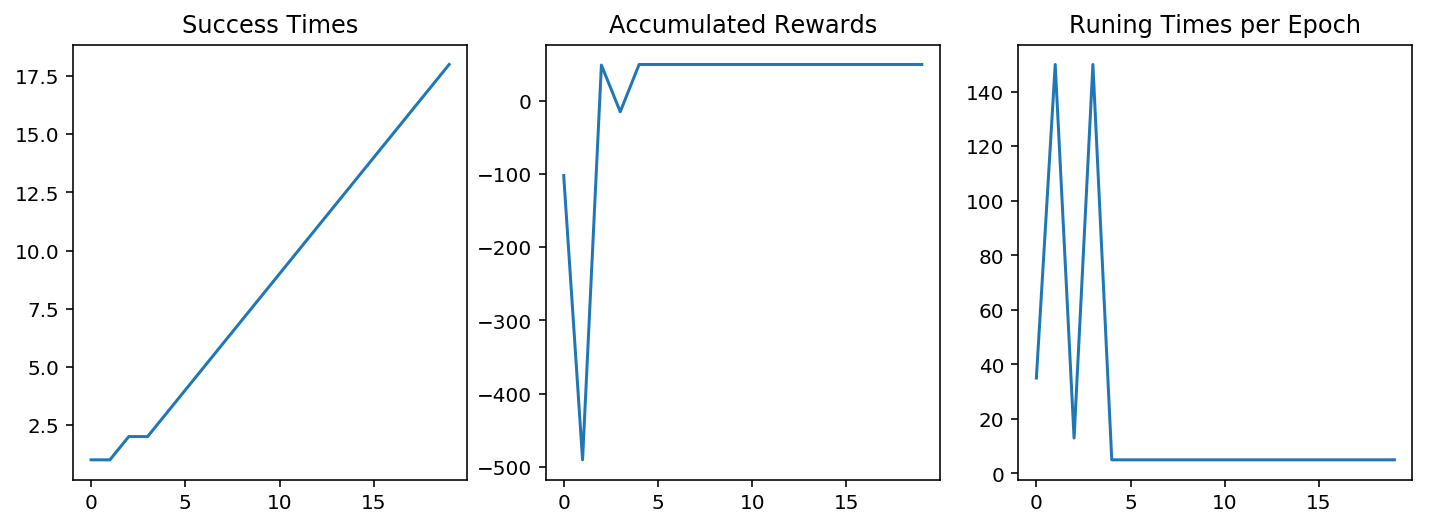

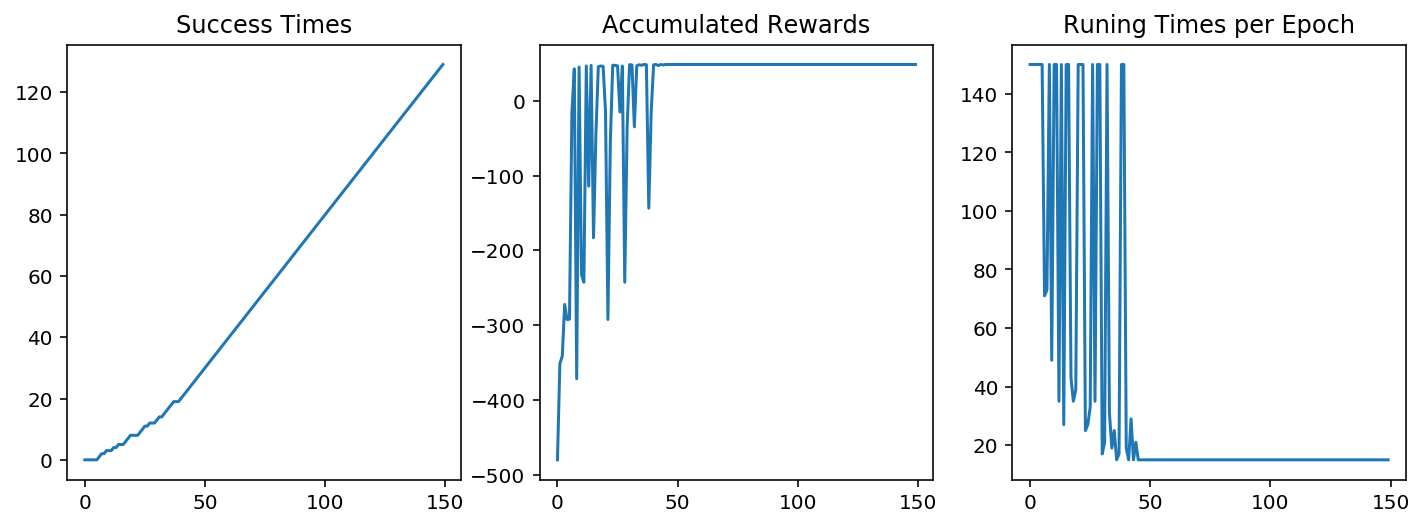

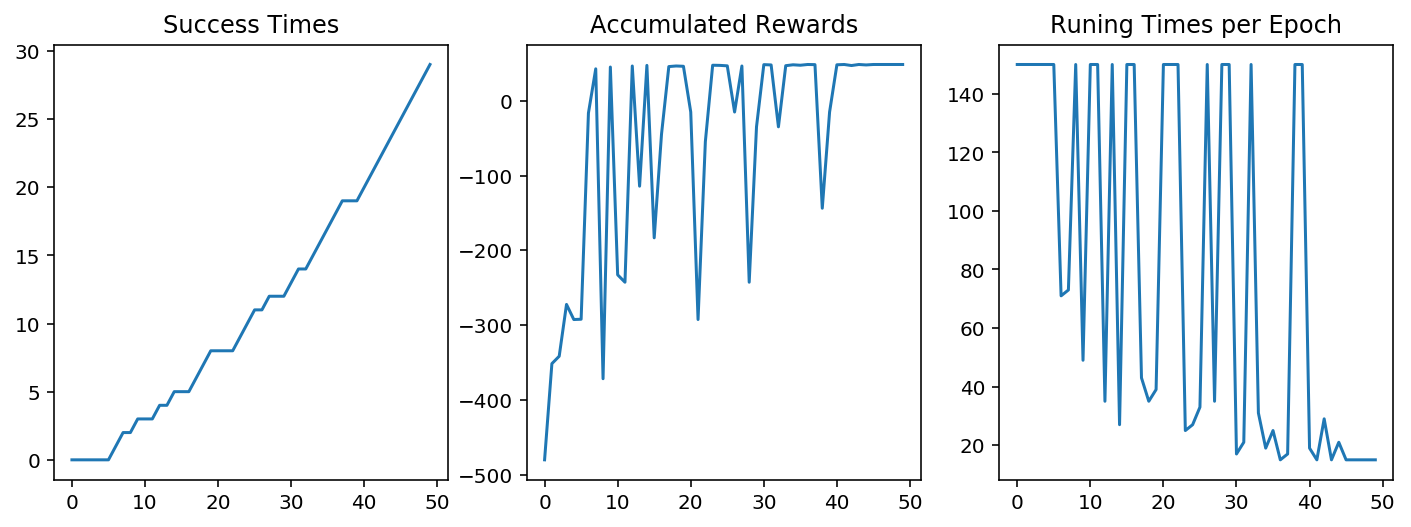

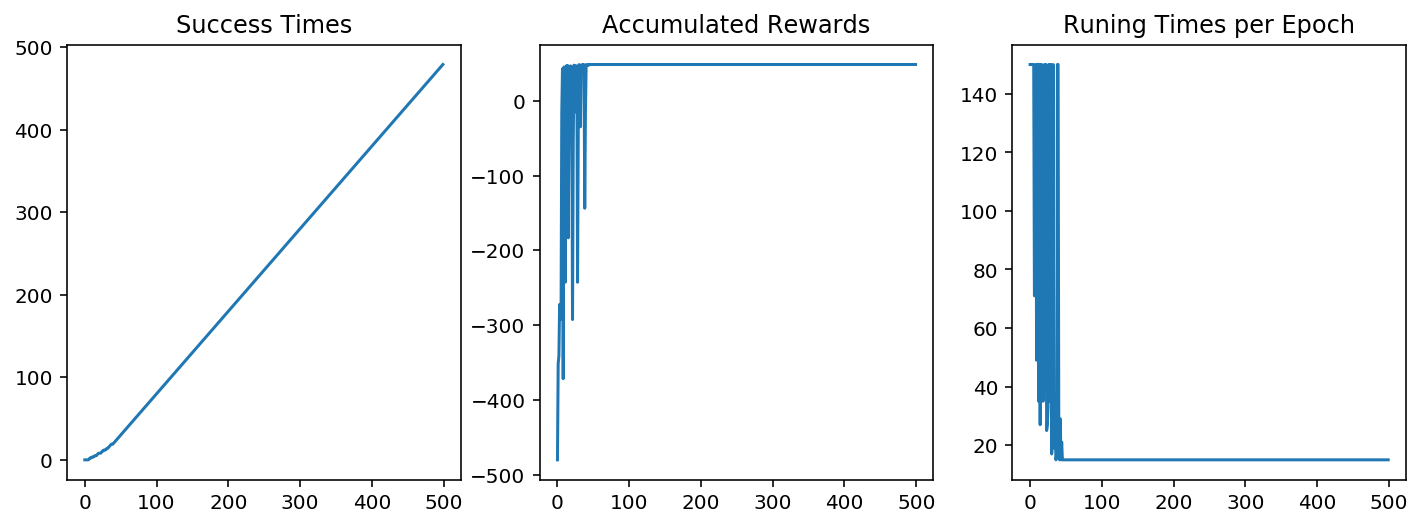

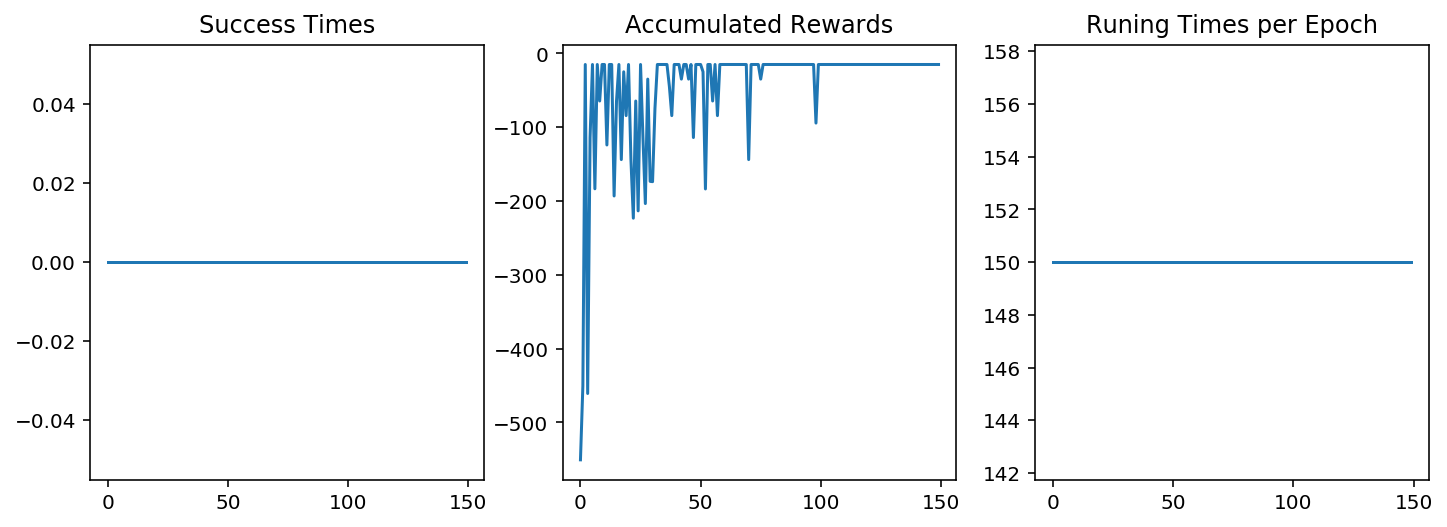

In [63]:
runner1.plot_results()
runner2a.plot_results()
runner2b.plot_results()
runner2c.plot_results()
runner3.plot_results()

##### (回答区)

**问题1**
环境为16*16时：
- epoch = 150
    - 推荐50-150
    - 根据上面2a，2b，2c的结果，虽然eporch很大的时候能够几次就找到结果，但是耗费时间非常长。epoch=50和150的运行时间差不多。
- eposilon0 = 0.5 （太小和太大都会造成收敛慢）
- alpha = 0.5 （新旧经验各50%）
- gamma = 0.9 （一般都是0.9）

**问题2**
上面try的几个记录（实际上改来改去有快100遍了）发现：
- epoch 要适中
    - 原因是 epoch 太小，总走不了几步就reset走之前的路去了，太大了一次尝试就会探索很多，但是因为没有迭代这种尝试计算代价太大
    - 另外，收敛速度和trap数量有关系
    - 特别注意，和随机出来的陷阱数量也有关系，所以要检查maze
- eposilon0 默认0.5 
    - 如果trap越多，收敛越慢，因为这时候可能要到目标必须踩雷
    - 而算法reward又要求避开雷，这里就会卡得比较慢
    - 这种情况 eposilon 就需要大一点，这样的话随机走的情况会多，也就会多踩雷之后再往前走且trap占的格数比例越大
- 地图要检查！结论和随机地图关系很大，有一次随机出来两个陷阱夹着目标，就没有跑出来

**问题3**
- 虽然跑出了结果，不是很满意：
    - 地图的随机性影响太大（尤其是trap多的时候）方法：可以循环调用，多次结果取平均数的方法来评定结果。
    - 寻找参数的方式比较费劲，试了好长时间。方法：写函数，对参数像 grid_search 类似的方式进行自动讯号。**请问老师：是否有这样的工具**
    - 尝试和寻找新的算法（后续复盘时候再考虑）

<center><a id='explor'>/更新参数探索(v3)/</a></center>

- 之前的尝试对大小、epoch数、迷宫复杂度（trap）数量和运行效率进行了尝试。
- 根据评审老师反馈，将在之前的基础上：
    - 固定一个比较合适的迷宫
    - 对 epsilon0、 alpha、gamma 进行探索测试
    - 以上参数对于maze没有变化，所以可以使用固定的迷宫

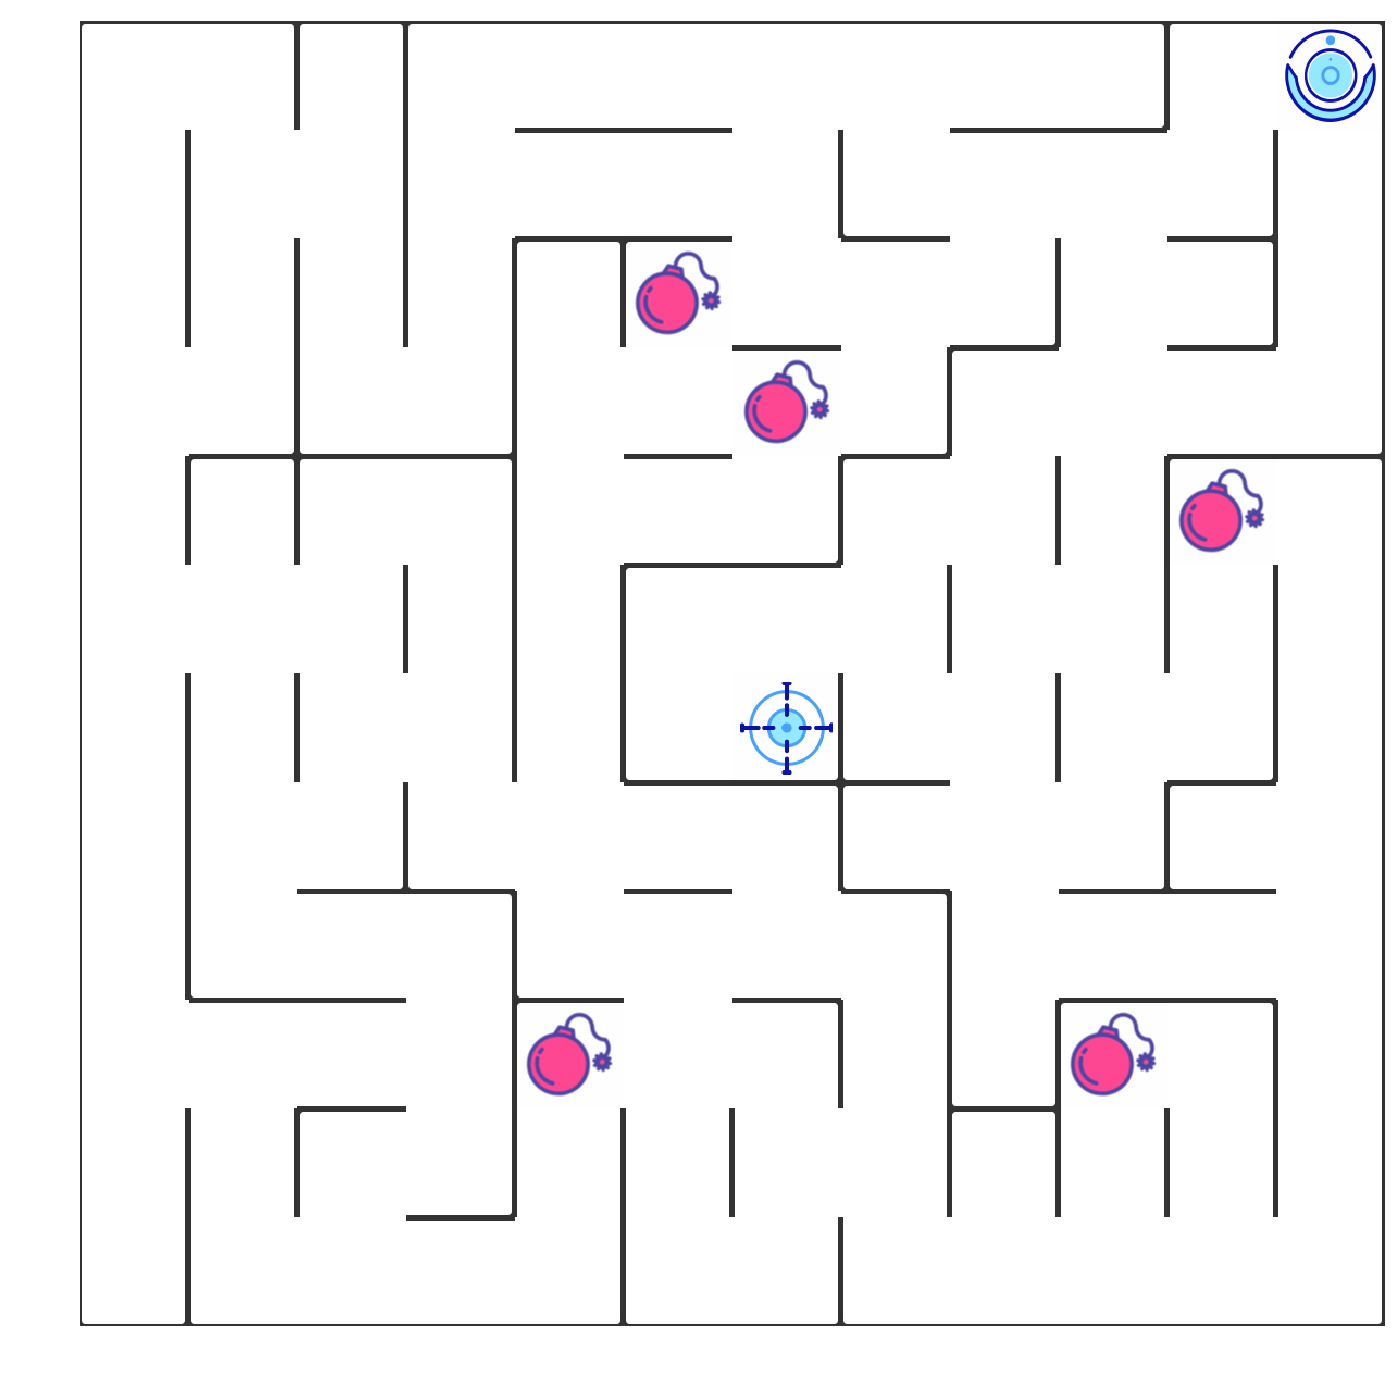

Maze of size (12, 12)


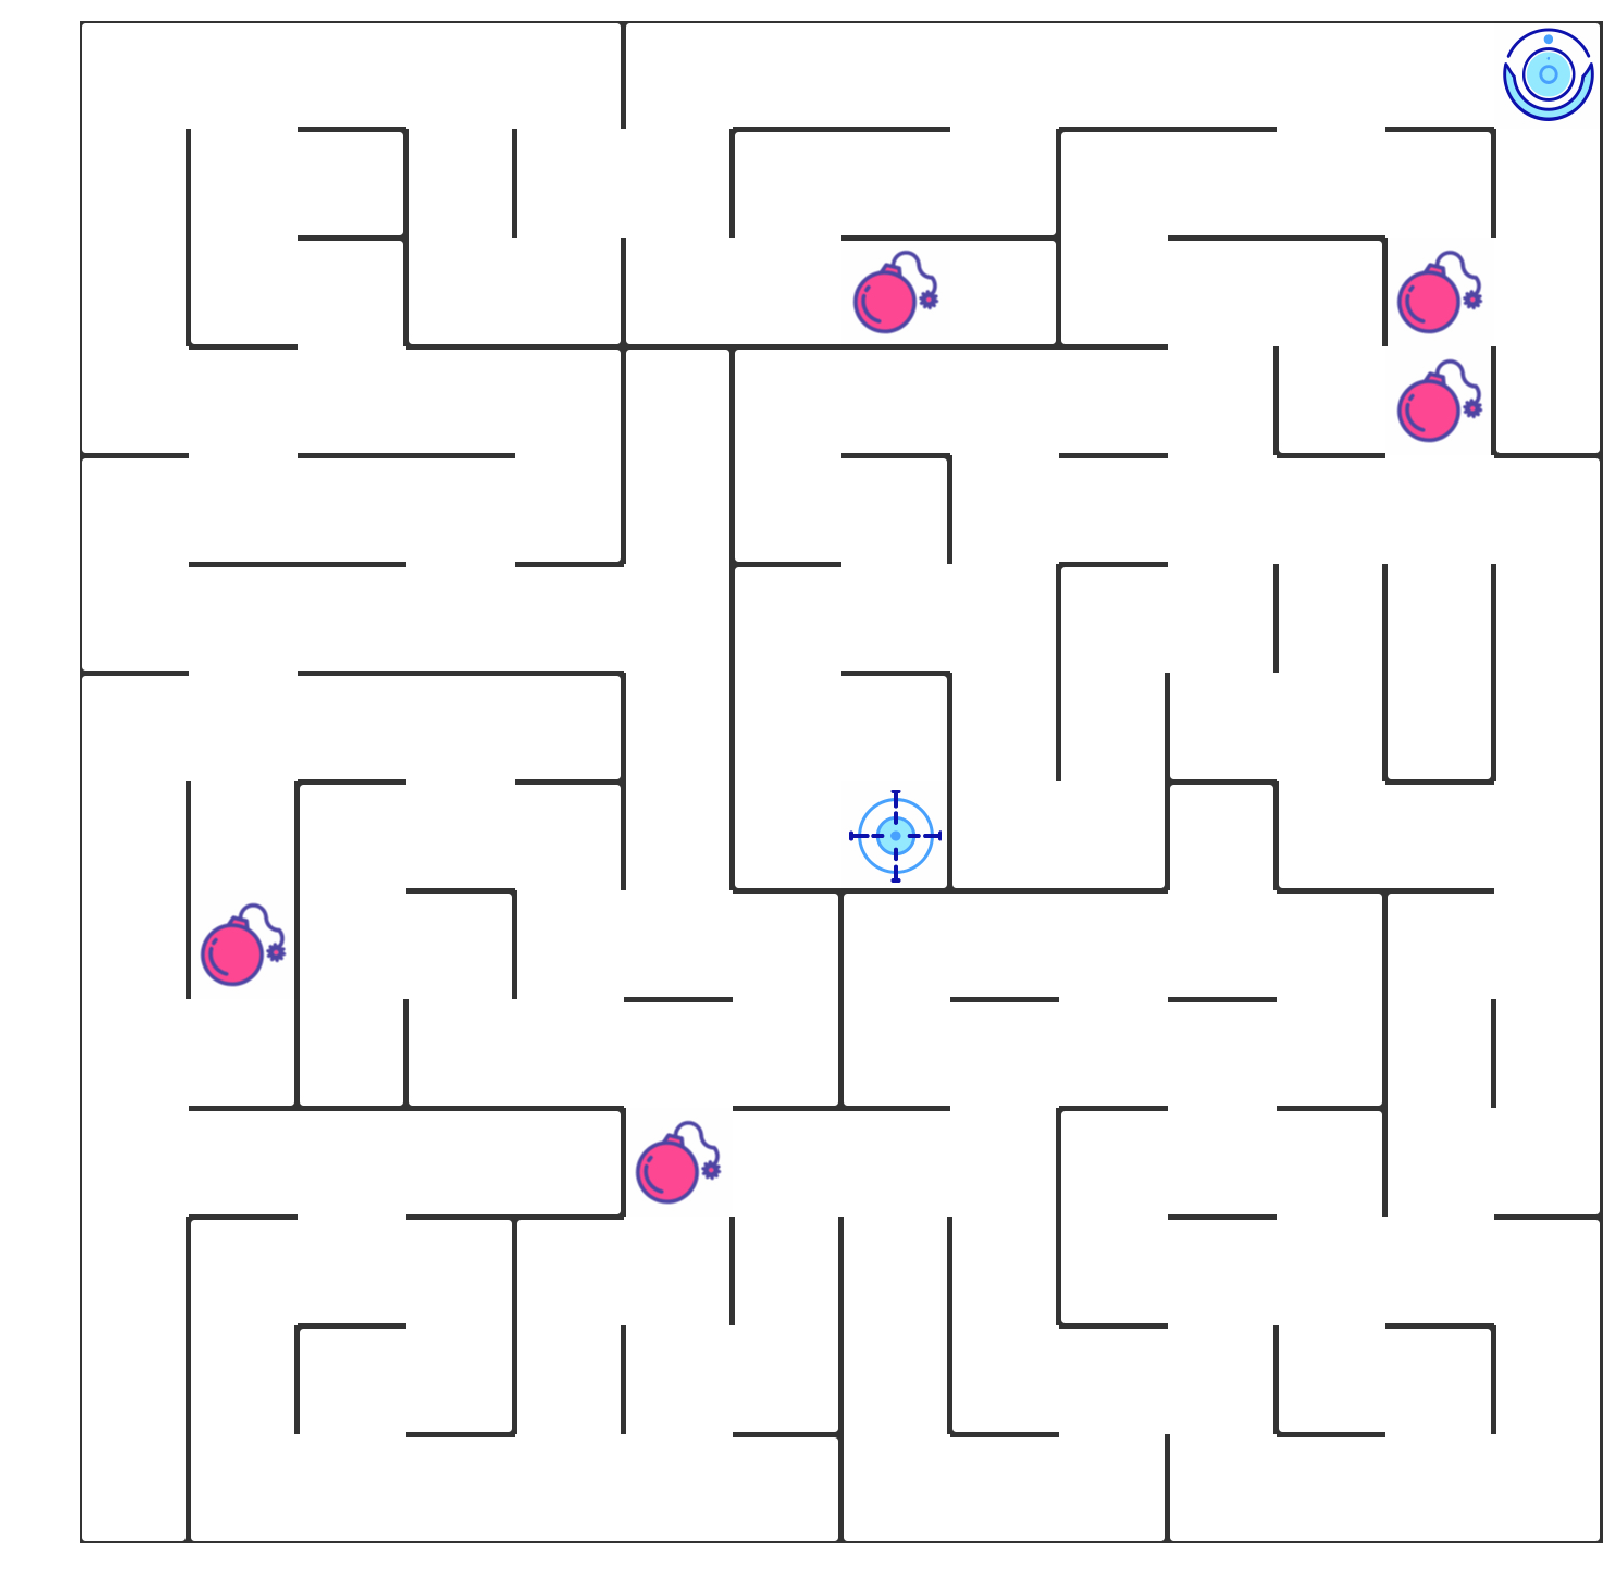

Maze of size (14, 14)


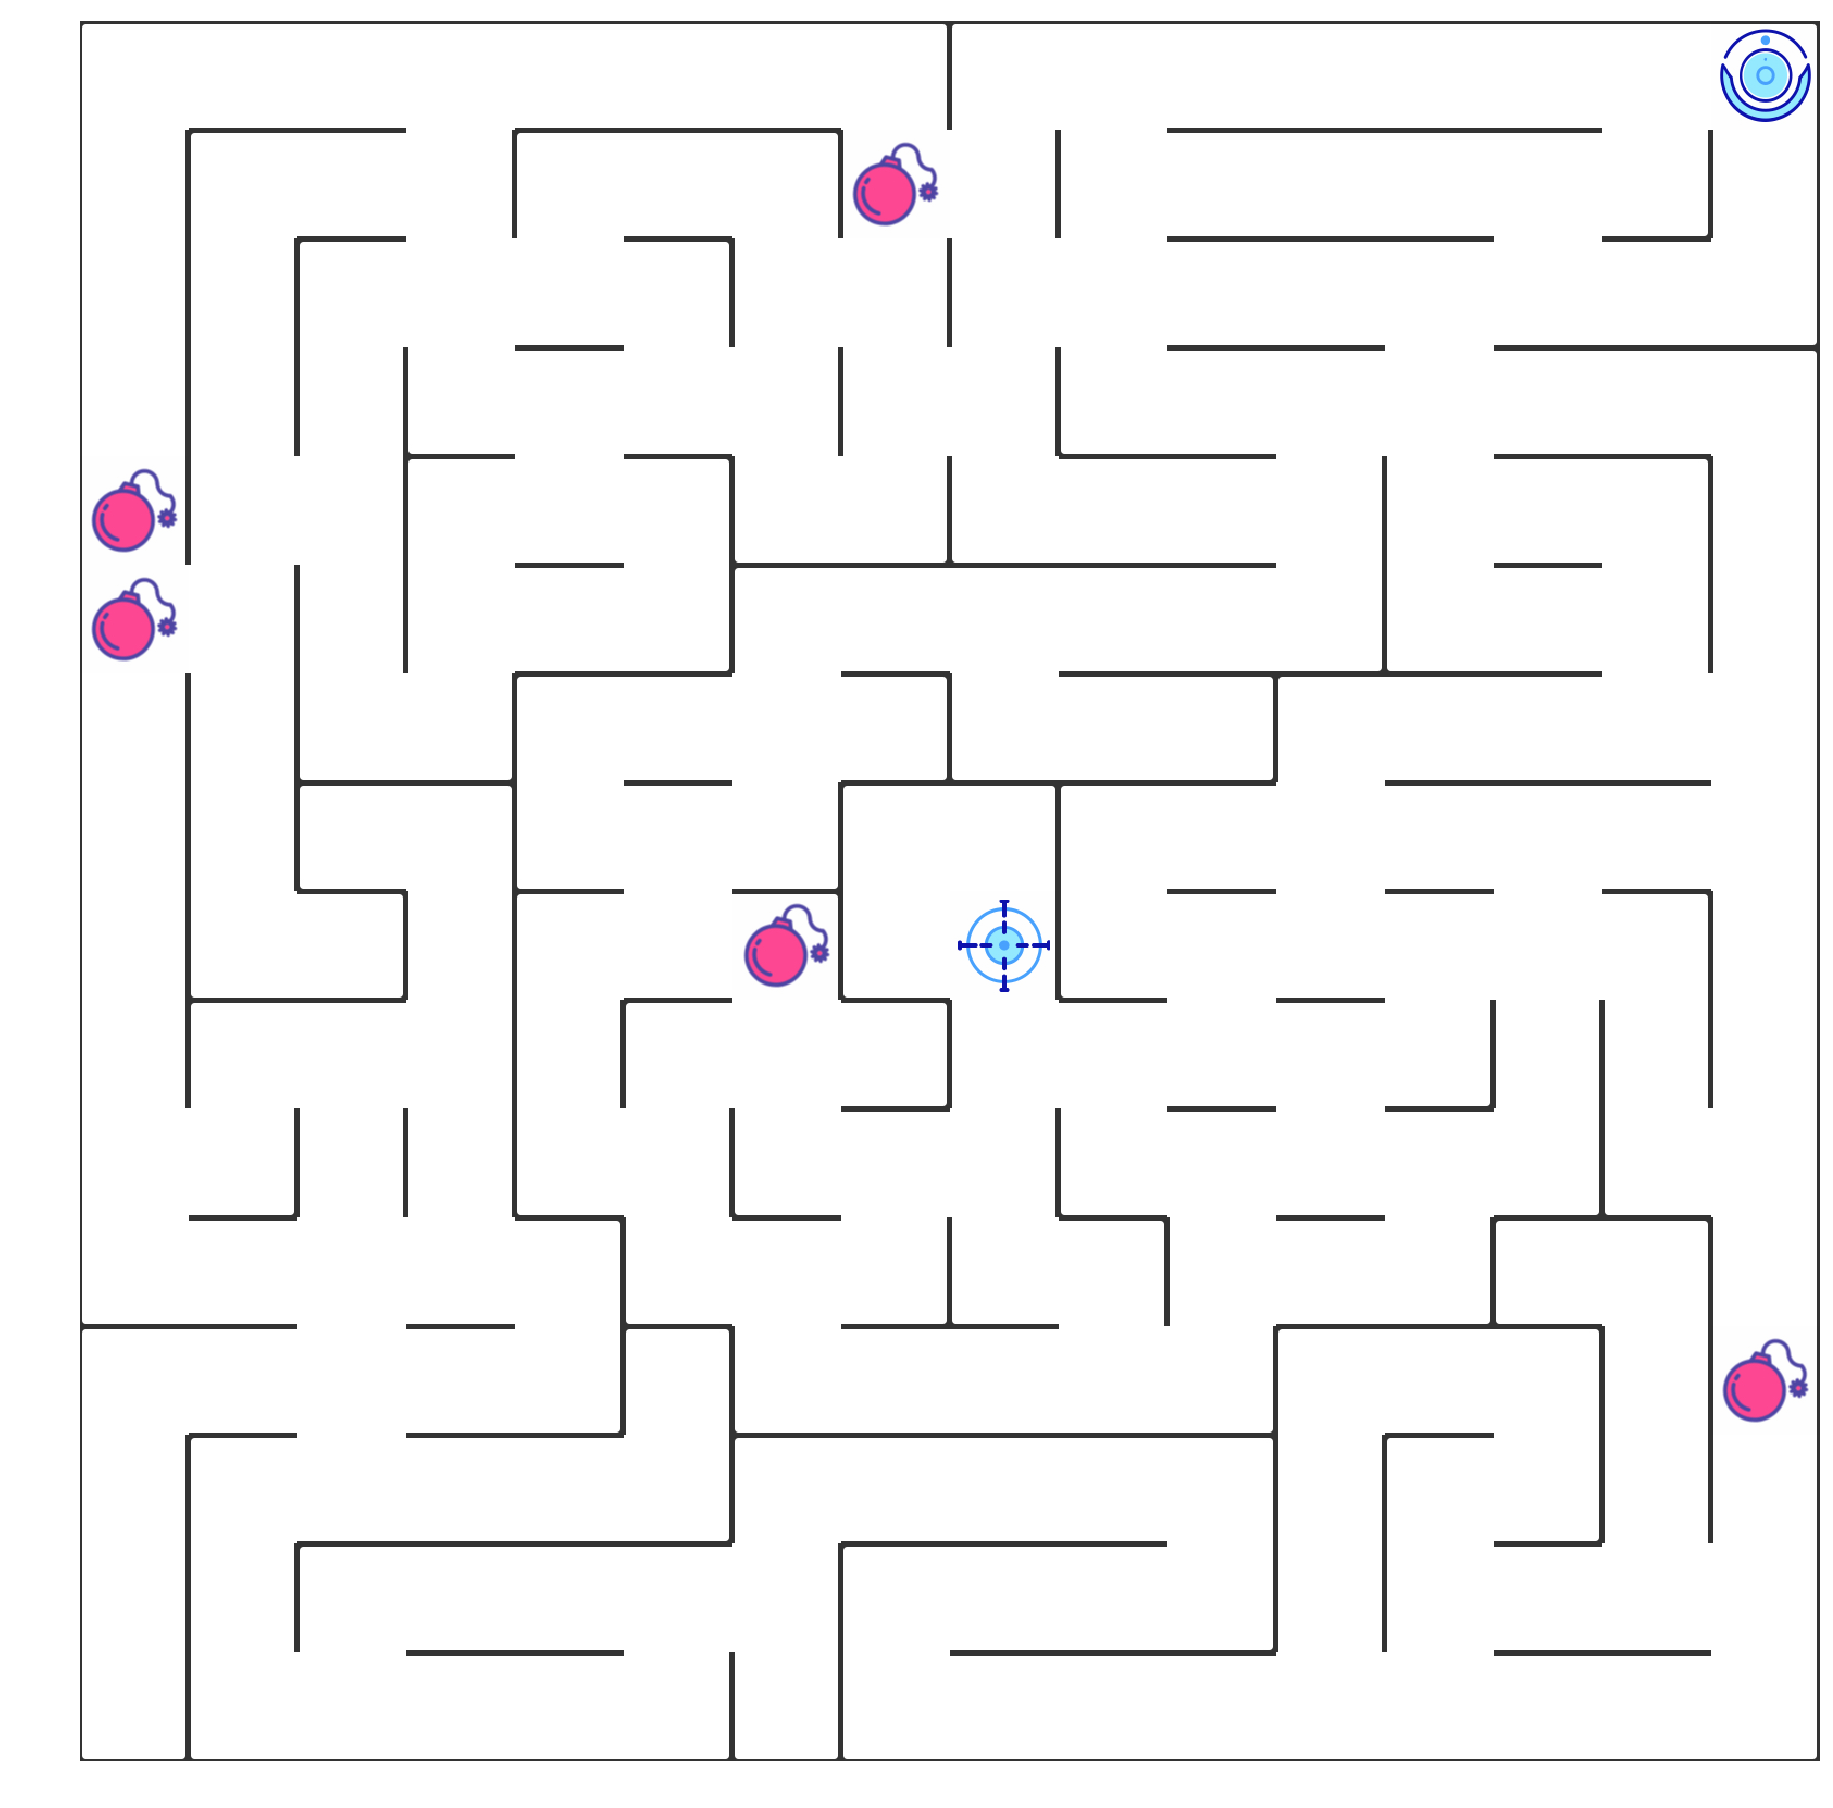

Maze of size (16, 16)


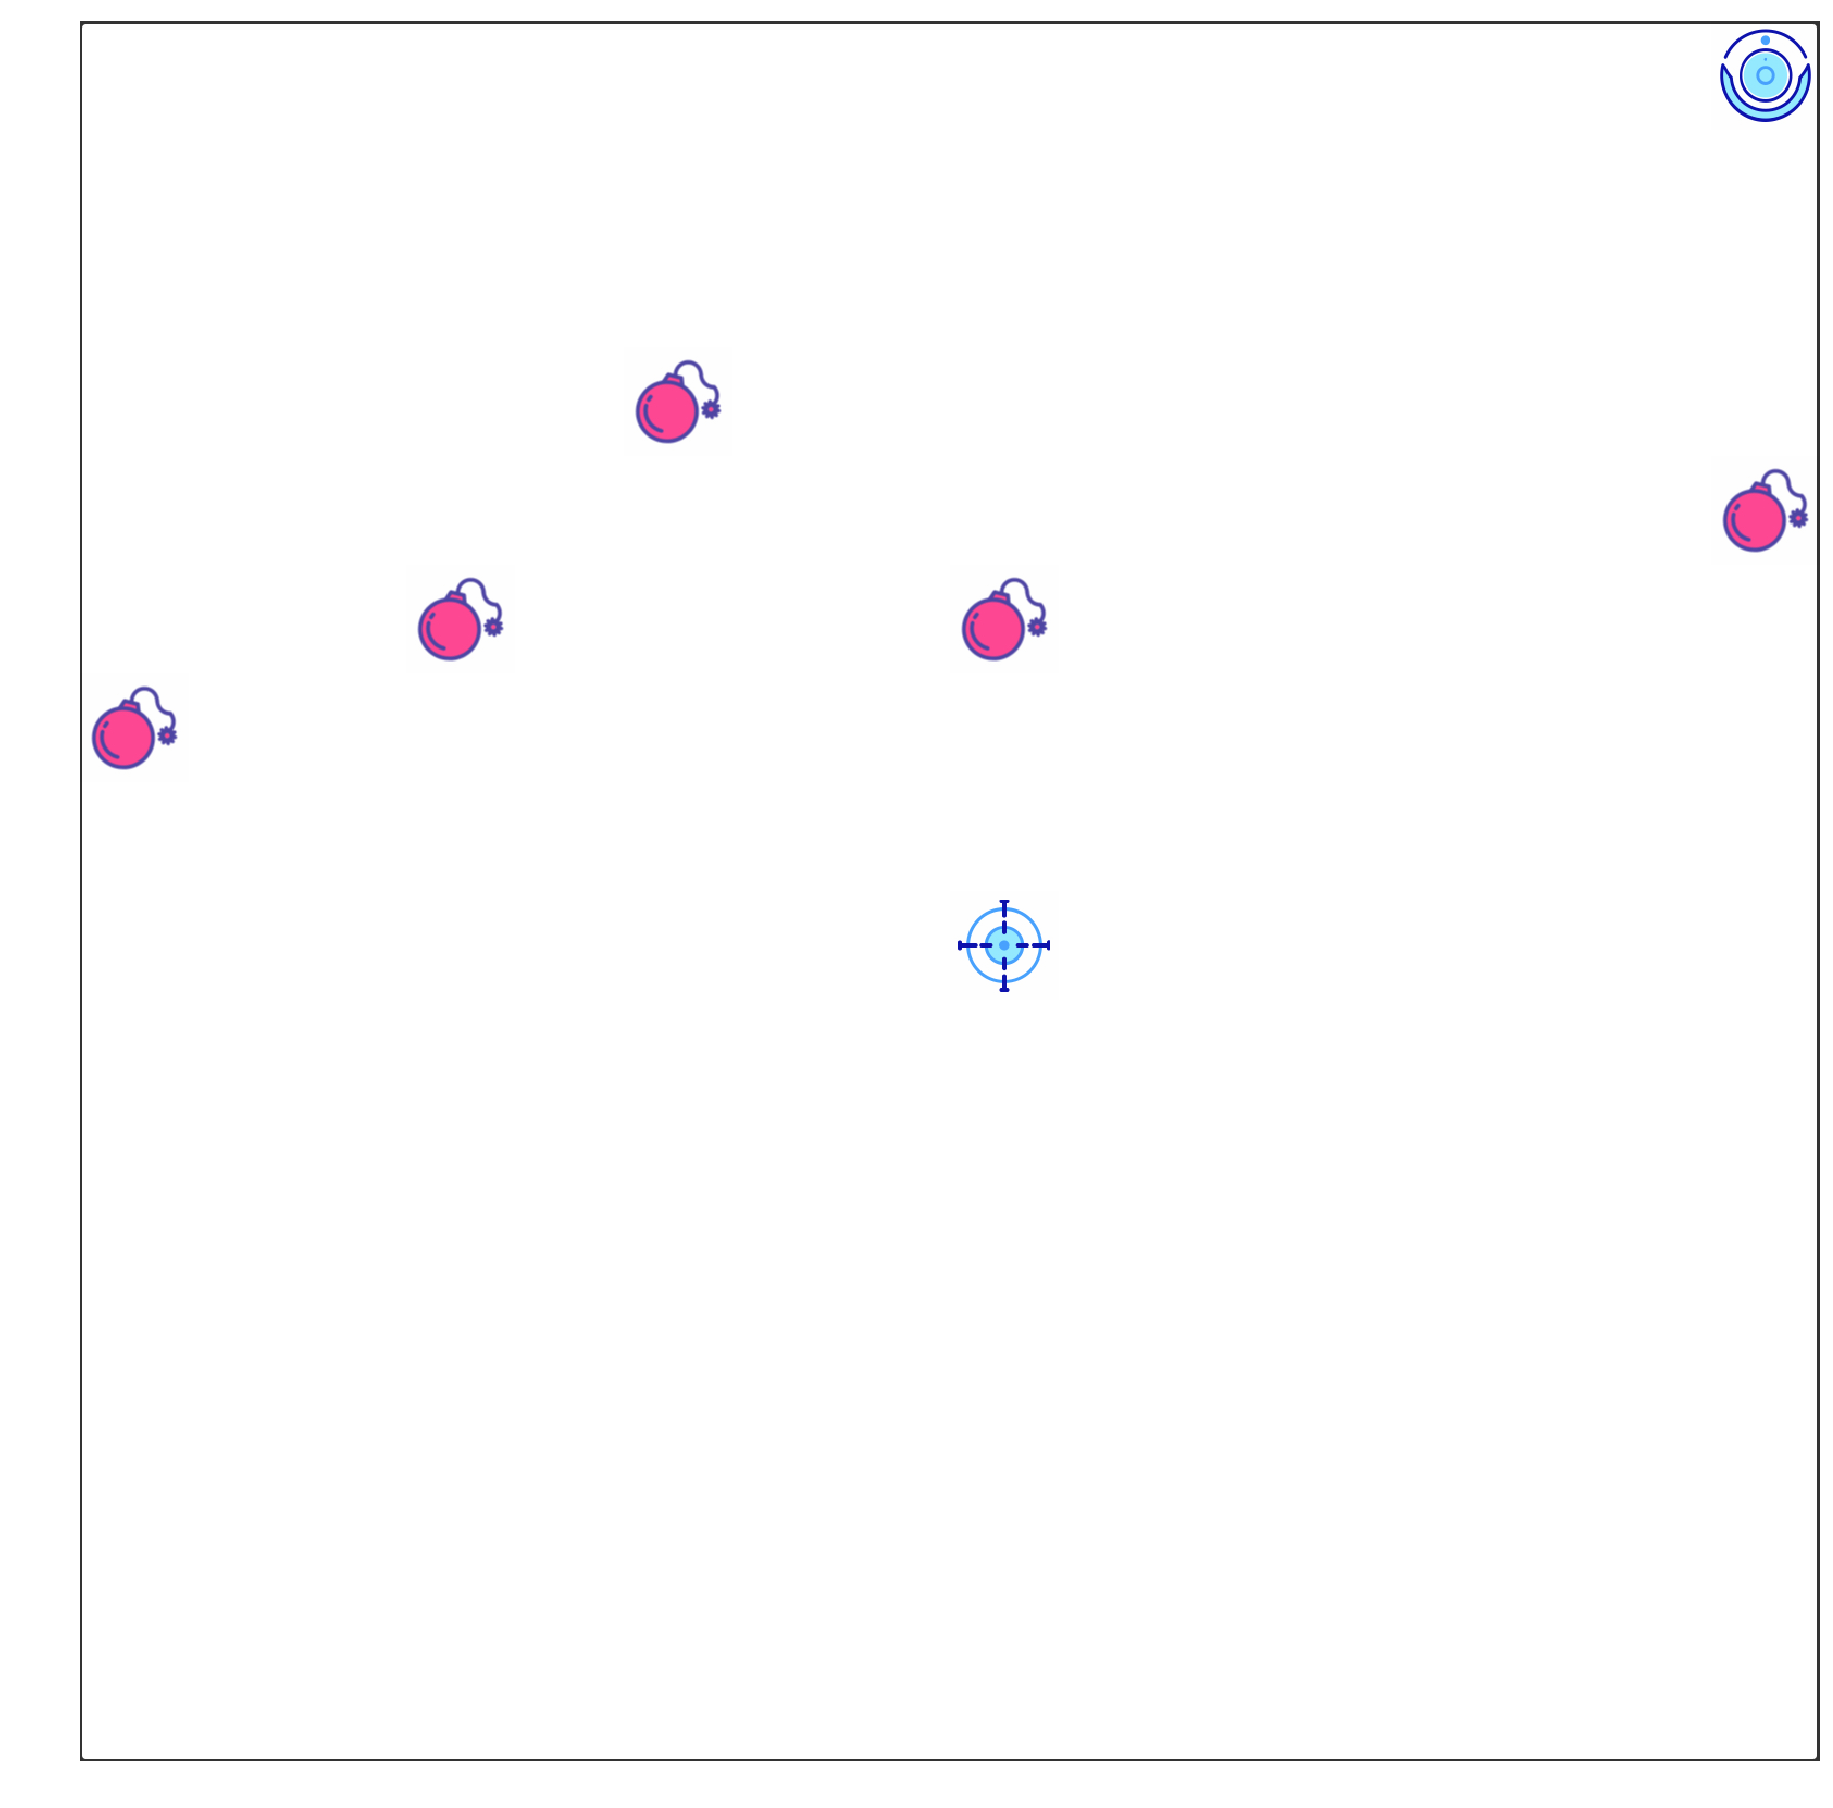

Maze of size (16, 16)


In [76]:
# import os 读入sub folder下的maze
import os
files = ['maze_01.txt', 'maze_02.txt', 'maze_03.txt', 'maze_04.txt']

for i in files:
    file = os.path.join('./test_world/', i)
    g=Maze(file)
    print(g)

# 经过判断 maze_03 比较合适，将在后续调参中使用
# maze04数据有问题

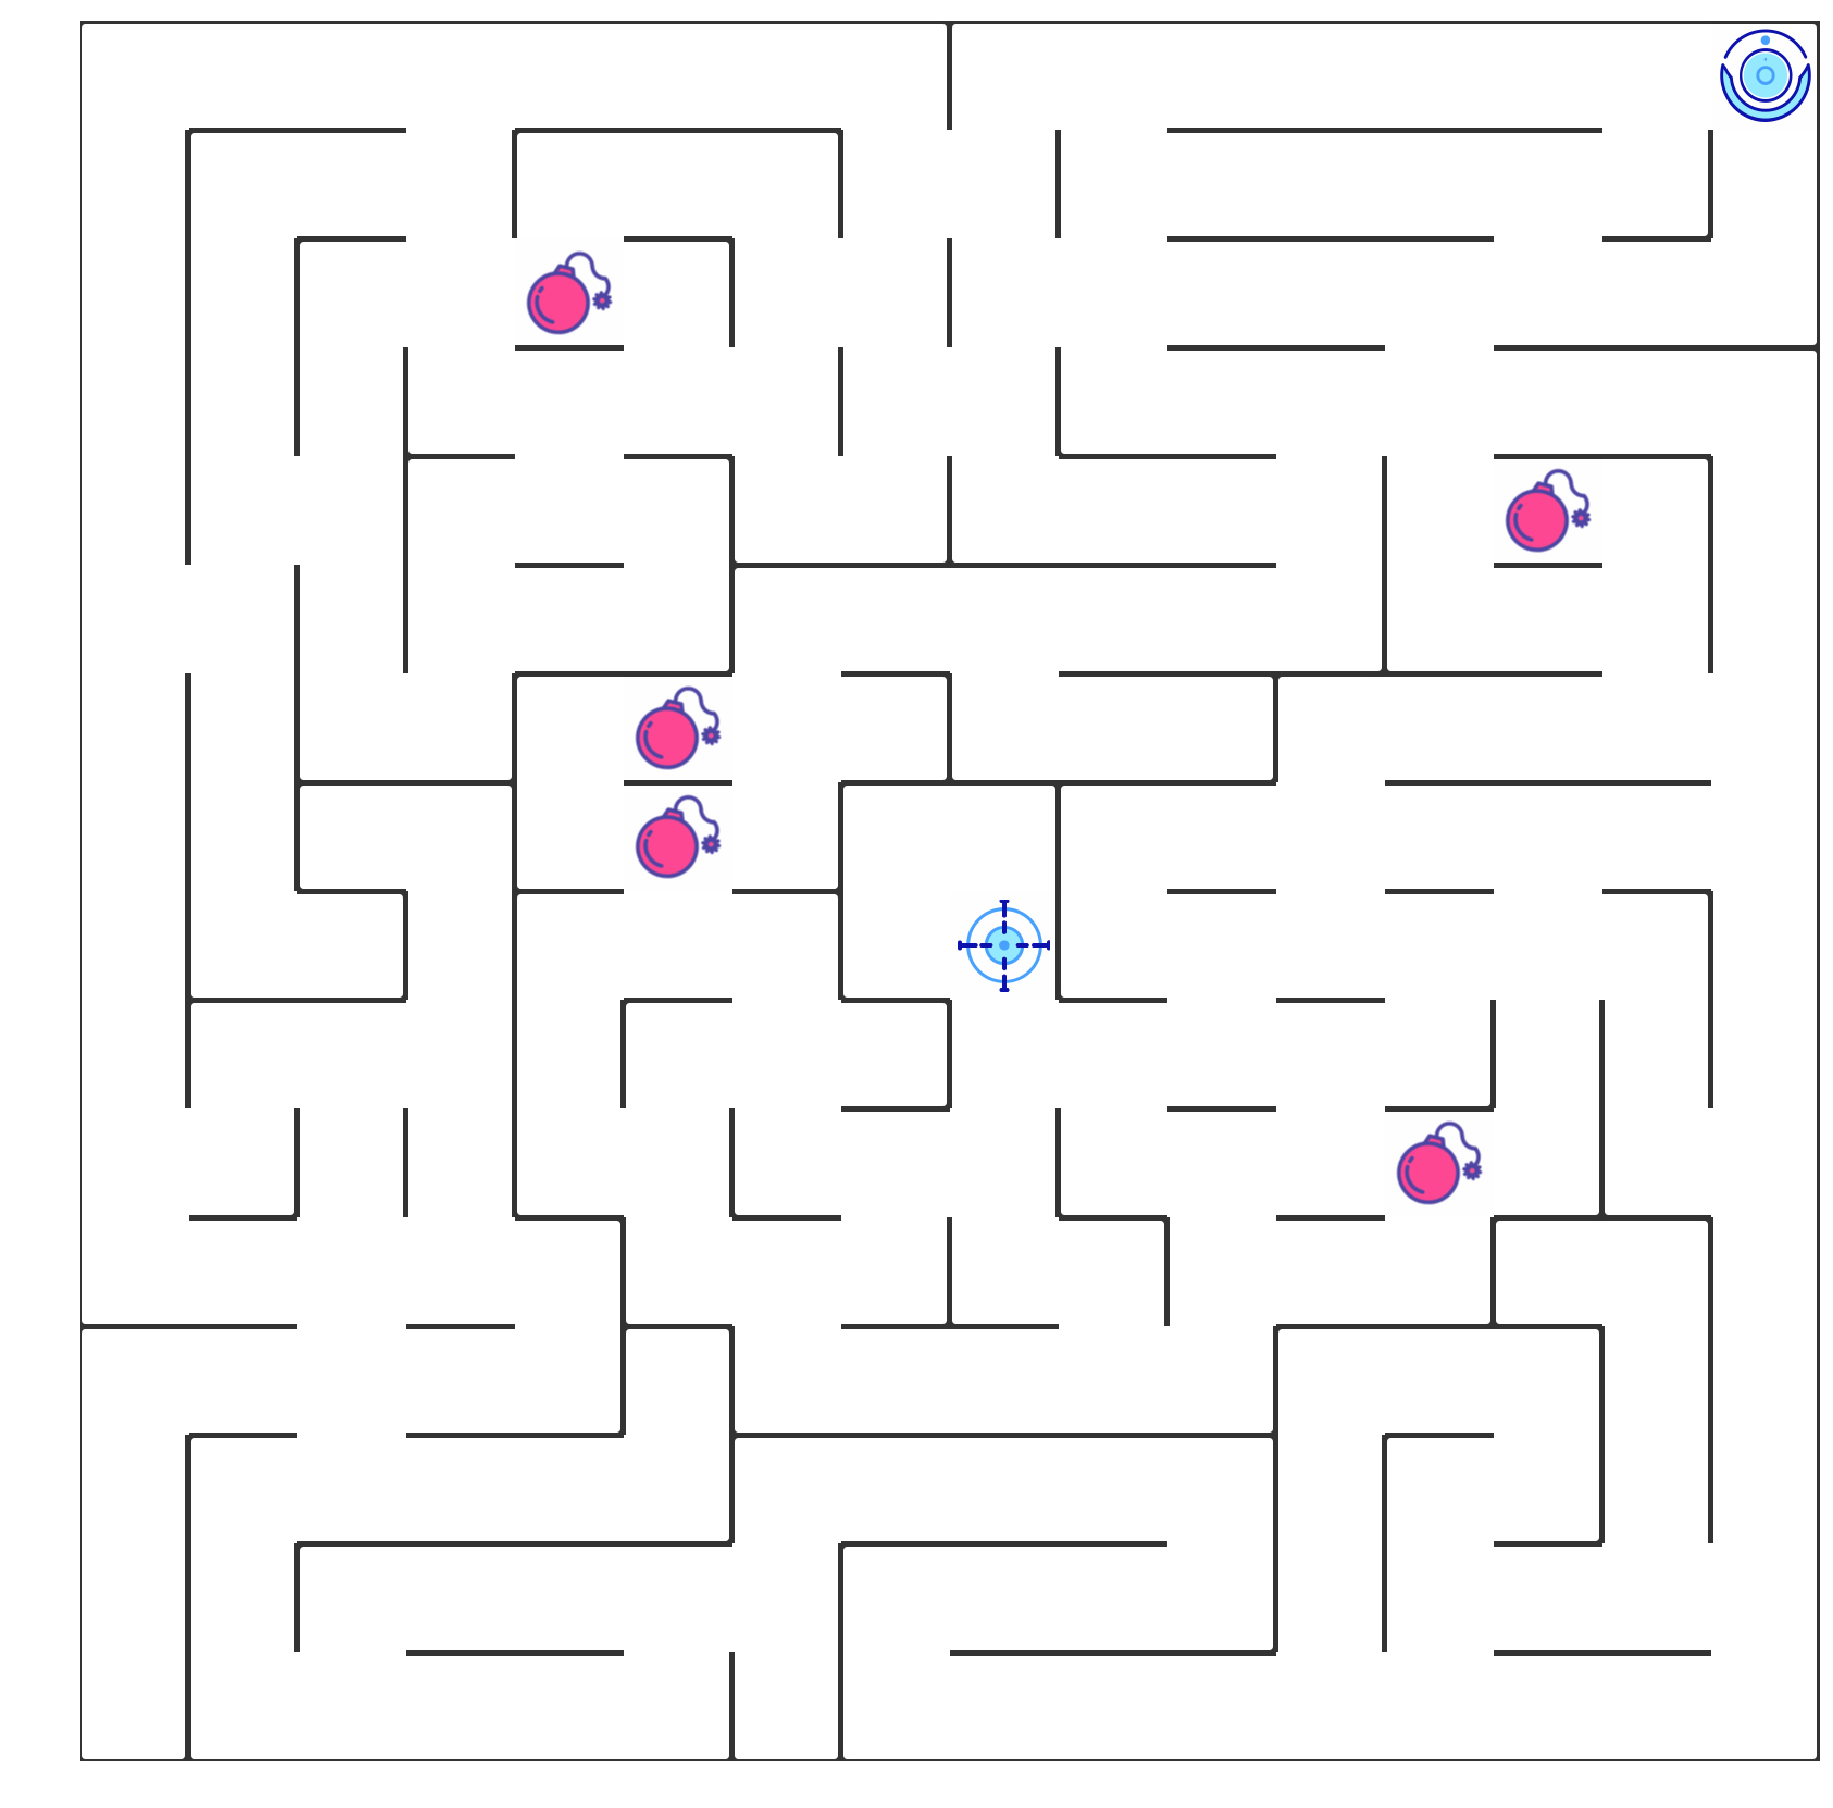

Maze of size (16, 16)

In [84]:
# check 地图（fix）
file = os.path.join('./test_world/', 'maze_03.txt')
gfix=Maze(file)
gfix
# 发现trap生成也是随机的（后续复盘时候再研究 Maze，看看可不可指定）
# 本代码框只能运行一遍

In [90]:
# v3 run test
## pras:

# fixed
epoch = 150
g = gfix
epsilon = 0.5
alpha = 0.5
gamma = 0.9

# testing
epsilon_list = [0.3, 0.5, 0.7]
alpha_list = [0.3, 0.5, 0.7]
gamma_list = [0.85, 0.9, 0.95]

In [118]:
## loops: (drops)
for e in epsilon_list:
    for a in alpha_list:
        for g in gamma_list:
            pass
            #print(str(e) + str(a) + str(g))
            # print('\n --- Para Testing: epsilon:{}, alpha:{}, gamma:{} ---'.format(e,a,g))

## 做到这里发现有点奇怪，这样 matrix 的比较有些繁琐
## 此处不是探索，只用确定同一个参数的微调即可
## 而且训练时间太长 3*3*3 = 27 ，放弃

--- 0.3 ---


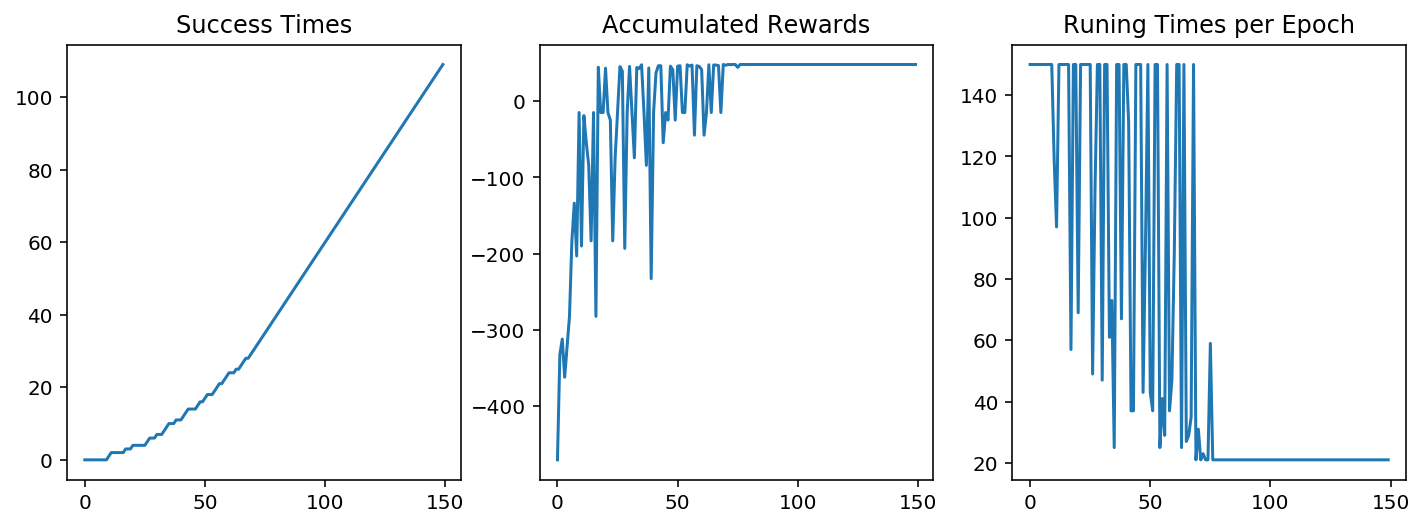

--- 0.5 ---


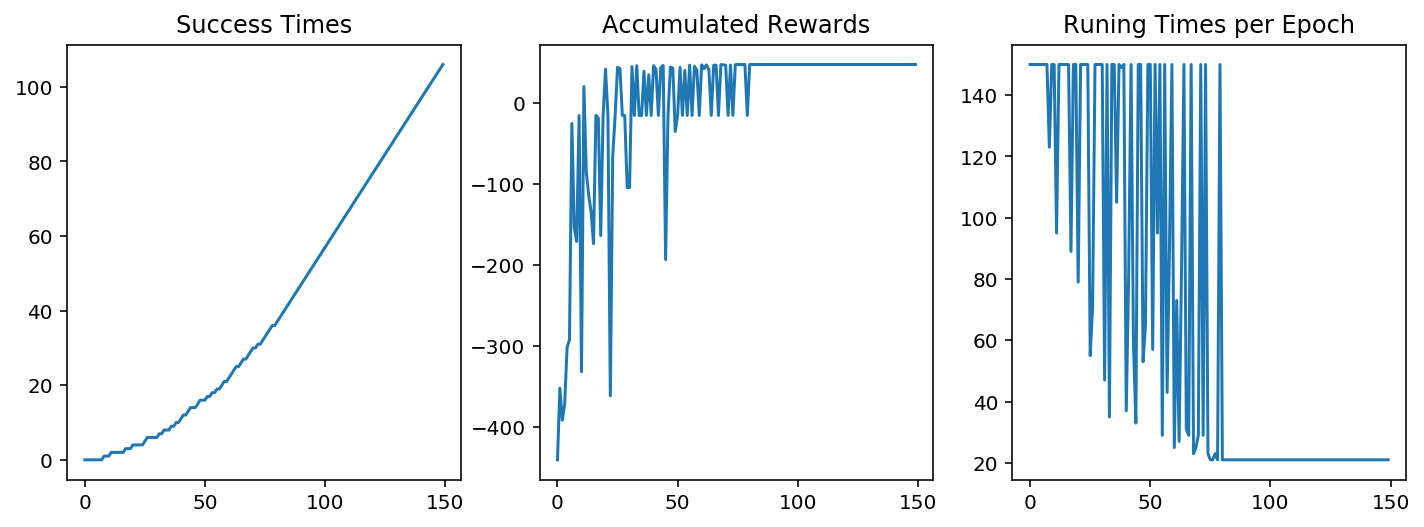

--- 0.7 ---


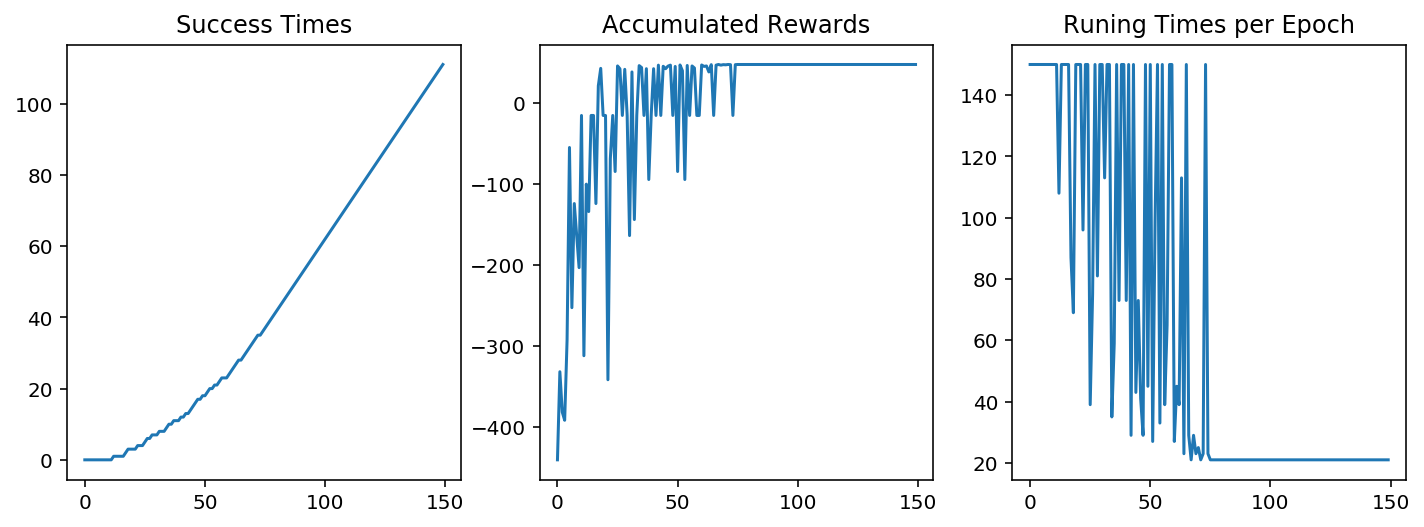

In [134]:
## loops：new with only one para each
### e loops
for e in epsilon_list:
    
    ## fixed
    epoch = 150
    alpha = 0.5
    gamma = 0.9
    epsilon0 = e
    g = gfix
    
    print('--- {} ---'.format(epsilon0))
    
    r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
    r.set_status(learning=True)
    
    runner_e = Runner(r, g)
    runner_e.run_training(epoch, display_direction=True)
    runner_e.plot_results()
    
## loop 中的自动变量需要转换为 dict 实现，后续修改：
# https://stackoverflow.com/questions/14819849/create-lists-of-unique-names-in-a-for-loop-in-python

---0.3---


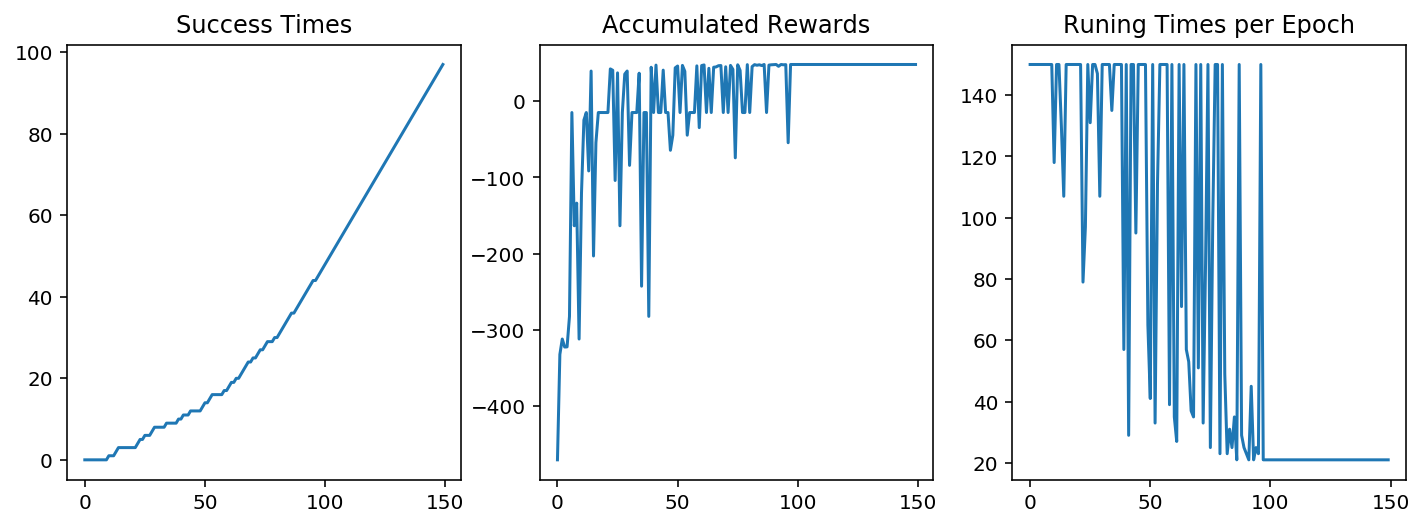

---0.5---


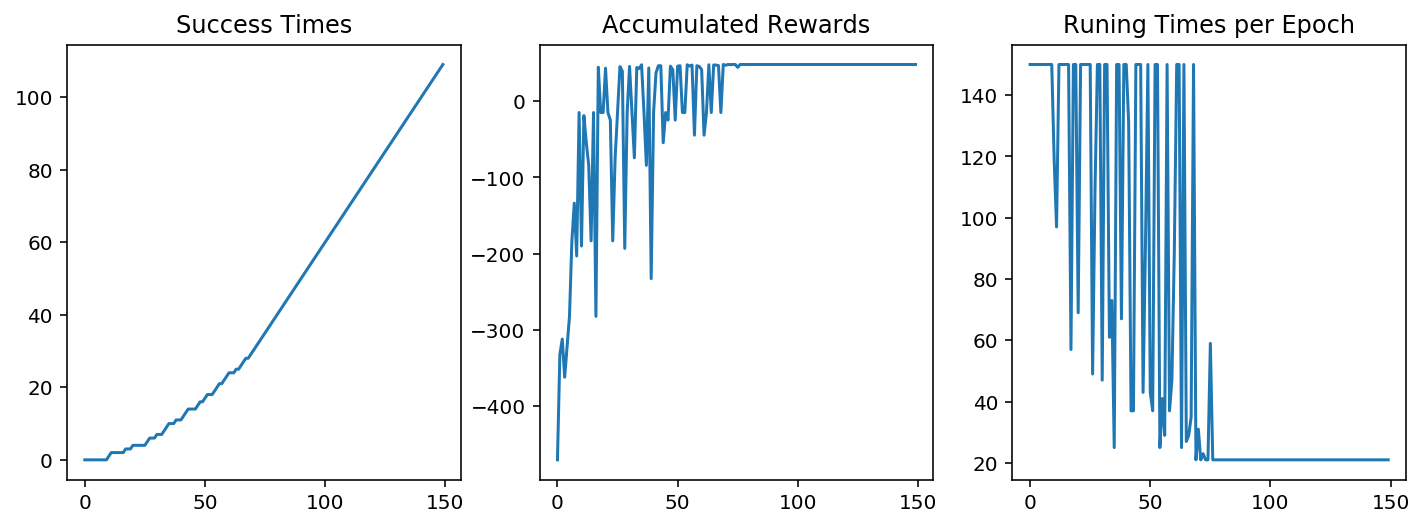

---0.7---


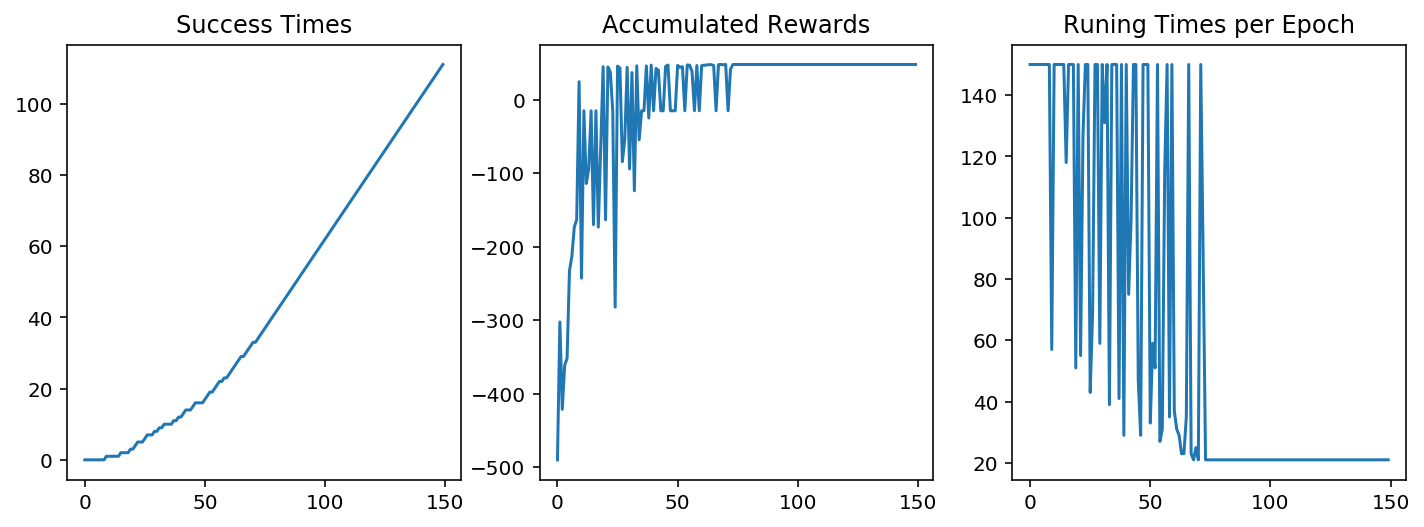

In [135]:
### a loops
for a in alpha_list:
    ## fixed
    epoch = 150
    alpha = a
    gamma = 0.9
    epsilon0 = 0.5
    g = gfix
    
    print('---{}---'.format(alpha))
    
    r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
    r.set_status(learning=True)
    
    runner_a = Runner(r, g)
    runner_a.run_training(epoch, display_direction=True)
    # print('\n --- Para Testing: epsilon:{}, alpha:{}, gamma:{} ---'.format(e,a,g))
    runner_a.plot_results()

---0.85---


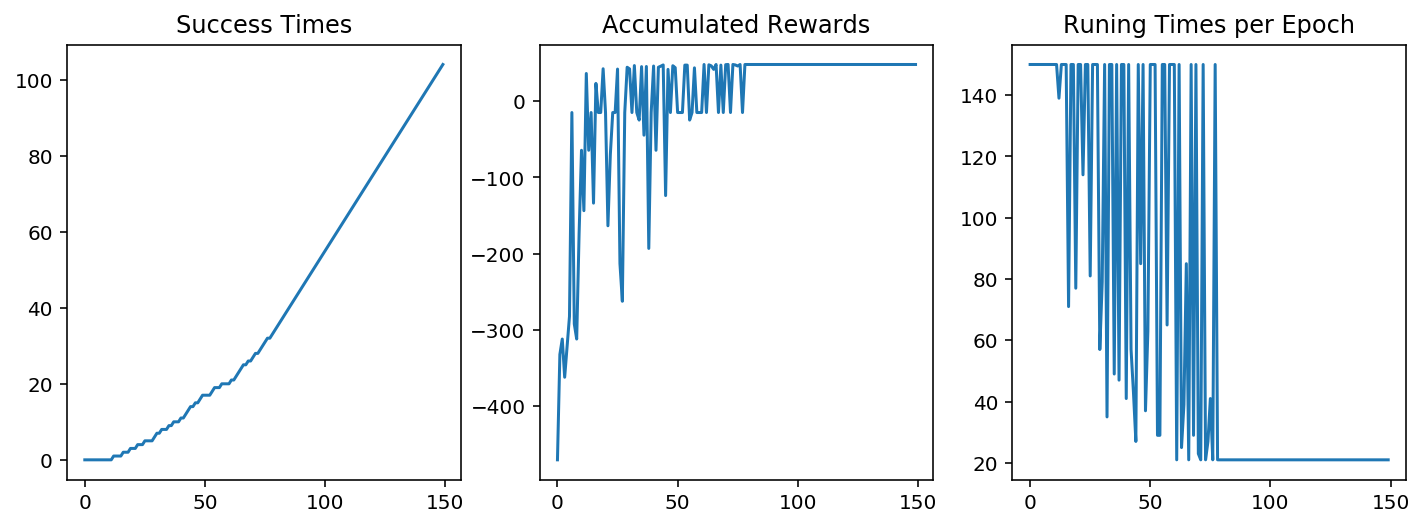

---0.9---


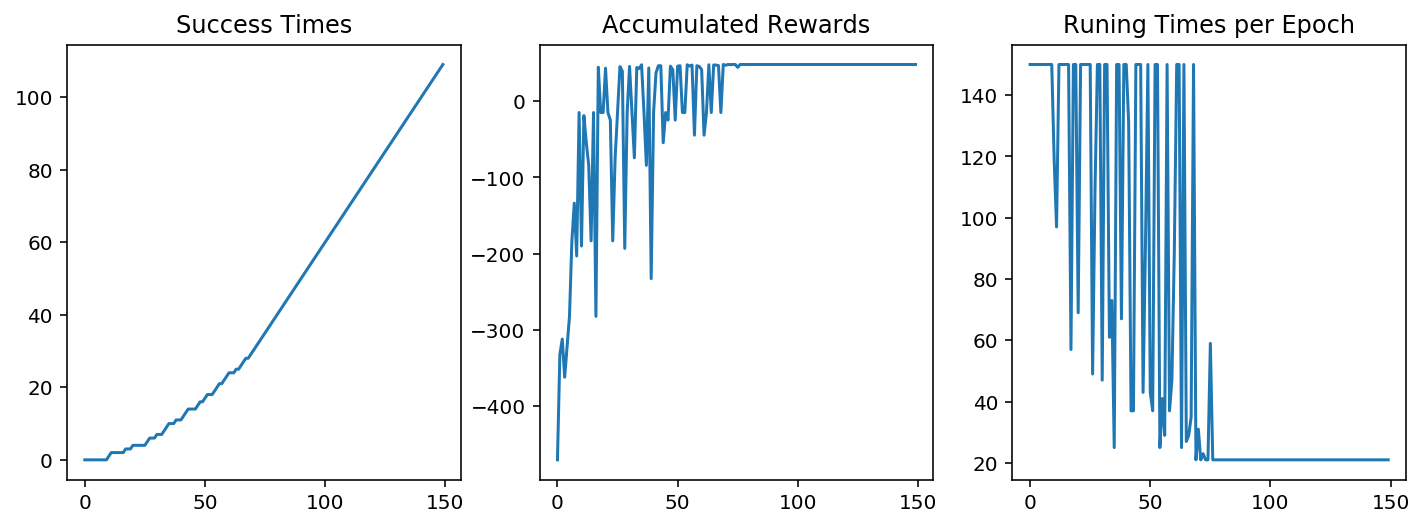

---0.95---


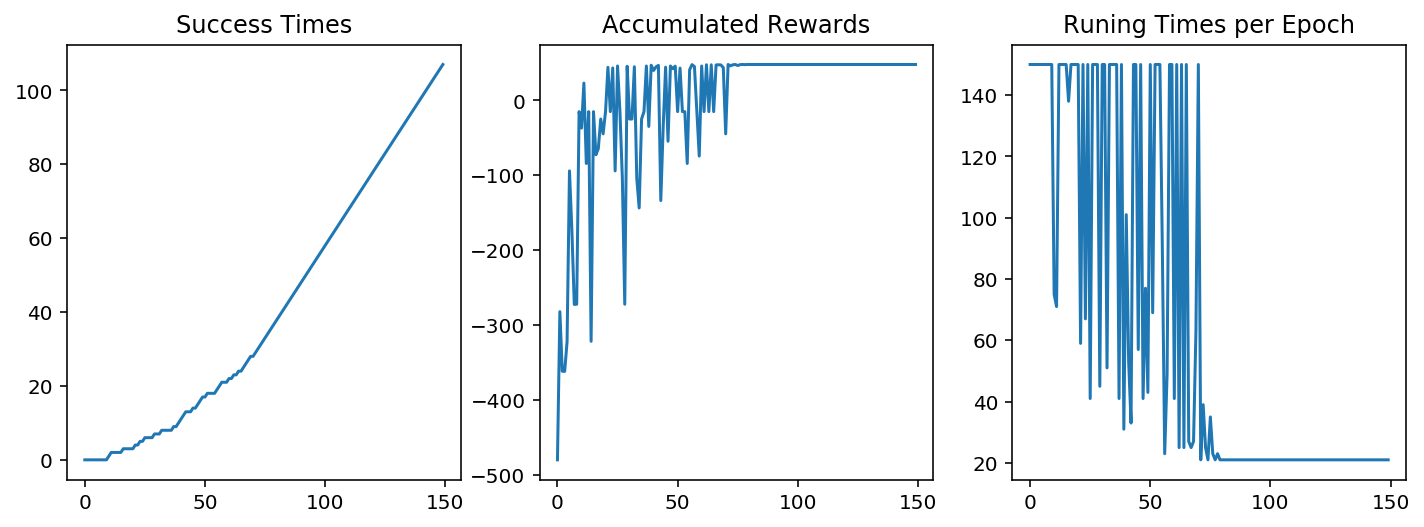

In [136]:
### g loops
for g in gamma_list:
    ## fixed
    epoch = 150
    alpha = 0.5
    gamma = g
    epsilon0 = 0.5
    g = gfix
    
    print('---{}---'.format(gamma))
    
    r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
    r.set_status(learning=True)
    
    runner_g = Runner(r, g)
    runner_g.run_training(epoch, display_direction=True)
    # print('\n --- Para Testing: epsilon:{}, alpha:{}, gamma:{} ---'.format(e,a,g))
    runner_g.plot_results()

<center><a id='final'>/更新最后结论(v3)/</a></center>
- 以上代码框增加了对于 epsilon、alpha、gamma参数的尝试，结论如下：
    - epsilon 取值 0.3, 0.5, 0.7 结果变化不大。
        - epsion 是小车随机走动（不按照QTable）的概率，当遇到炸弹的话，如果没有设置随机走动，可能会进入死循环。epsilon的意义是让机器人能够探索当前步骤并不最优的方向，从而有可能找到综合考虑比较优的道路。
    - alpla 取值 0.3, 0.5, 0.7 有明显区别
        - alpha 是更新算法之后的学习率，学习率越高，从刚刚得到的结果采用率越高。为了结合新旧经验，设置 alpha，越接近0越保守，越接近1越激进
        - 0.5 和 0.7 的 Running Time 明显比 0.3 的减少，但两者相差不多
        - 在 Accumulated Rewards 中，0.7 > 0.5 > 0.3 非常明显。0.7 的值收敛非常稳定
        - 此结论只适用于 gfix 这个比较简单的地图。如果地图变化为更复杂，那么 a 不会是越大越好，因为要考虑到遇到陷阱后还在下次继续前进的可能性
    - gamma 取值 0.85，0.9，0.95 结果有明显区别
        - gamma 的用处是对未来奖励的惩罚，俗话说：两鸟在林，不如一鸟在手。0.9的意思是每隔一个epoch，奖励衰减为90%。
        - 0.9 时 Accumulated Rewards 和 Running Times 都是最好的
        - 0.9 的默认值在 gfix 地图上比较接近最佳实践

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`